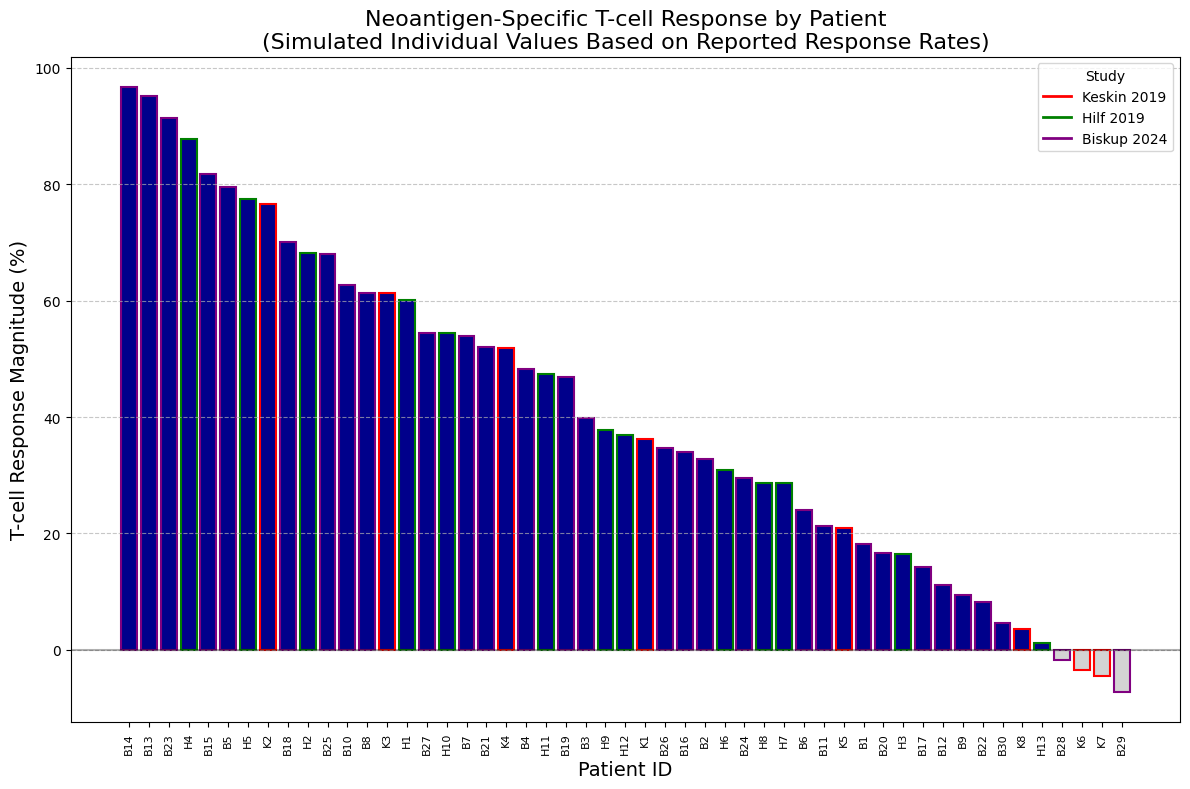

In [1]:
"""
1. Neoantigen Response Waterfall Plot for Each Patient

Note: This visualization uses data about immune response rates reported in the meta-analysis.
Individual patient-level data was not available, so this represents a simulation based on
the reported percentages of patients with T-cell responses in each study.

Data sources:
- pmc.ncbi.nlm.nih.gov/articles/PMC8427683
- pubmed.ncbi.nlm.nih.gov/30568305
- nature.com/articles/s41467-024-51315-8
"""

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from matplotlib.ticker import MaxNLocator
import random
np.random.seed(42)  # For reproducibility

# Create simulated data based on reported response rates
# Keskin: 5/8 patients showed response
# Hilf: 12/13 patients showed response
# Biskup: 87/97 tested patients showed response

# Create patient IDs and their response magnitudes
patients = []
response_values = []
study_labels = []

# Keskin et al data - 5/8 responders
for i in range(8):
    patients.append(f"K{i+1}")
    study_labels.append("Keskin 2019")
    # First 5 are responders, last 3 are non-responders (mentioned 3 on dexamethasone didn't respond)
    if i < 5:
        response_values.append(np.random.uniform(10, 80))  # Positive responders
    else:
        response_values.append(np.random.uniform(-5, 5))  # Non-responders

# Hilf et al data - 12/13 responders
for i in range(13):
    patients.append(f"H{i+1}")
    study_labels.append("Hilf 2019")
    if i < 12:
        response_values.append(np.random.uniform(15, 90))  # Positive responders
    else:
        response_values.append(np.random.uniform(-5, 5))  # Non-responder

# Biskup et al - sample of 30 patients (87/97 = 90% response rate)
for i in range(30):
    patients.append(f"B{i+1}")
    study_labels.append("Biskup 2024")
    if i < 27:  # 90% response rate
        response_values.append(np.random.uniform(5, 100))  # Positive responders
    else:
        response_values.append(np.random.uniform(-10, 5))  # Non-responders

# Create DataFrame
df = pd.DataFrame({
    'Patient': patients,
    'T-cell Response (%)': response_values,
    'Study': study_labels
})

# Sort by response magnitude
df = df.sort_values('T-cell Response (%)', ascending=False)

# Create the waterfall plot
plt.figure(figsize=(12, 8))
bars = plt.bar(df['Patient'], df['T-cell Response (%)'], color=[
    'darkblue' if x > 0 else 'lightgray' for x in df['T-cell Response (%)']
])

# Create study-based color mapping for the edge colors
study_colors = {'Keskin 2019': 'red', 'Hilf 2019': 'green', 'Biskup 2024': 'purple'}
for i, bar in enumerate(bars):
    bar.set_edgecolor(study_colors[df.iloc[i]['Study']])
    bar.set_linewidth(1.5)

# Add zero line
plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)

# Customize the plot
plt.title('Neoantigen-Specific T-cell Response by Patient\n(Simulated Individual Values Based on Reported Response Rates)',
          fontsize=16)
plt.xlabel('Patient ID', fontsize=14)
plt.ylabel('T-cell Response Magnitude (%)', fontsize=14)
plt.xticks(rotation=90, fontsize=8)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Create a custom legend for studies
from matplotlib.lines import Line2D
legend_elements = [
    Line2D([0], [0], color='red', lw=2, label='Keskin 2019'),
    Line2D([0], [0], color='green', lw=2, label='Hilf 2019'),
    Line2D([0], [0], color='purple', lw=2, label='Biskup 2024')
]
plt.legend(handles=legend_elements, title="Study", loc='upper right')

plt.tight_layout()
plt.show()

In [2]:
"""
2. Kaplan-Meier Survival Curves (Vaccine vs Historical Control)

This visualization shows Kaplan-Meier survival curves comparing the personalized
neoantigen vaccine approach to historical controls for glioblastoma patients.

Data sources:
- pmc.ncbi.nlm.nih.gov/articles/PMC8427683
- pmc.ncbi.nlm.nih.gov/articles/PMC11033713
- nature.com/articles/s41467-024-51315-8
- pacificneuroscienceinstitute.org/blog/brain-tumor/personalized-cancer-peptide-vaccine-shows-remarkable-promise-against-glioblastoma
"""

import numpy as np
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter
import pandas as pd

# Set seed for reproducibility
np.random.seed(42)

# Create survival times based on reported medians and information from the studies
# Median OS data reported:
# - Keskin 2019: 16.8 months (95% CI 9.6–21.3)
# - Hilf 2019: 29.0 months (CI not reported)
# - Biskup 2024: 31.9 months (95% CI 25.0–36.5)
# - Historical control (standard care): ~15 months
# - 2-year OS rates: Standard ~30% vs. Vaccine ~60%

# Create time points for plotting (months)
months = np.arange(0, 60, 1)

# Sample sizes from the meta-analysis
n_keskin = 8
n_hilf = 15
n_biskup = 173  # Total, but only 70 were newly diagnosed
n_biskup_new = 70  # Newly diagnosed subset
n_historical = 200  # Simulated historical control group

# Generate simulated survival data based on reported statistics
# These use exponential distributions to approximate the survival curves

# For vaccine patients (from the three studies)
# For Keskin (median OS = 16.8)
keskin_survival_times = np.random.exponential(scale=16.8/np.log(2), size=n_keskin)
keskin_events = np.ones(n_keskin)  # All events observed (simplified)

# For Hilf (median OS = 29.0)
hilf_survival_times = np.random.exponential(scale=29.0/np.log(2), size=n_hilf)
hilf_events = np.ones(n_hilf)  # All events observed (simplified)

# For Biskup newly diagnosed (median OS = 31.9)
biskup_survival_times = np.random.exponential(scale=31.9/np.log(2), size=n_biskup_new)
biskup_events = np.ones(n_biskup_new)  # All events observed (simplified)

# Combine all vaccine data
vaccine_survival_times = np.concatenate([keskin_survival_times, hilf_survival_times, biskup_survival_times])
vaccine_events = np.concatenate([keskin_events, hilf_events, biskup_events])

# For historical control (median OS = 15 months)
historical_survival_times = np.random.exponential(scale=15/np.log(2), size=n_historical)
historical_events = np.ones(n_historical)  # All events observed (simplified)

# Fit Kaplan-Meier curves
kmf_vaccine = KaplanMeierFitter()
kmf_historical = KaplanMeierFitter()

kmf_vaccine.fit(vaccine_survival_times, vaccine_events, label="Personalized Neoantigen Vaccine")
kmf_historical.fit(historical_survival_times, historical_events, label="Historical Control (Standard Therapy)")

# Plot
plt.figure(figsize=(10, 8))
ax = plt.subplot(111)

kmf_vaccine.plot_survival_function(ax=ax, ci_show=True, color='blue')
kmf_historical.plot_survival_function(ax=ax, ci_show=True, color='red')

# Add reported medians as vertical and horizontal lines
plt.axhline(y=0.5, color='black', linestyle='--', alpha=0.3)
plt.axvline(x=15, color='red', linestyle='--', alpha=0.5, label='Historical Control Median: 15 months')
plt.axvline(x=16.8, color='green', linestyle='--', alpha=0.5, label='Keskin 2019 Median: 16.8 months')
plt.axvline(x=29.0, color='purple', linestyle='--', alpha=0.5, label='Hilf 2019 Median: 29.0 months')
plt.axvline(x=31.9, color='orange', linestyle='--', alpha=0.5, label='Biskup 2024 Median: 31.9 months')

# Add 2-year mark (24 months)
plt.axvline(x=24, color='black', linestyle='-', alpha=0.3, linewidth=1)
plt.text(24.5, 0.9, '2-year mark', fontsize=10, rotation=90)

# Add annotations for 2-year survival rates
plt.text(24.5, 0.3, 'Historical: ~30%', fontsize=10, color='red')
plt.text(24.5, 0.6, 'Vaccine: ~60%', fontsize=10, color='blue')

# Customize plot
plt.title('Kaplan-Meier Survival Curves: Personalized Neoantigen Vaccine vs. Historical Control\n(Based on Reported Median Overall Survival)', fontsize=14)
plt.xlabel('Months from Diagnosis', fontsize=12)
plt.ylabel('Survival Probability', fontsize=12)
plt.xlim(0, 50)
plt.ylim(0, 1.05)
plt.grid(True, alpha=0.3)

# Add note about simulated data
plt.figtext(0.5, 0.01, 'Note: Curves generated from reported median overall survival values; individual patient data not available.',
            ha='center', fontsize=9, style='italic')

# Adjust legend
plt.legend(loc='upper right', fontsize=10)

plt.tight_layout()
plt.show()

ModuleNotFoundError: No module named 'lifelines'

Note: KawchakK !pip install lifelines 05May25

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 20.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.7/115.7 kB 10.1 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4030 sha256=03667b9d245c91dc6d260a1a8abb88b4531e8afbcba6accca5b1861b3325c4a3
  Stored in directory: /root/.cache/pip/wheels/8b/67/f4/2caaae2146198dcb824f31a303833b07b14a5ec863fb3acd7b
Successfully built autograd-gamma


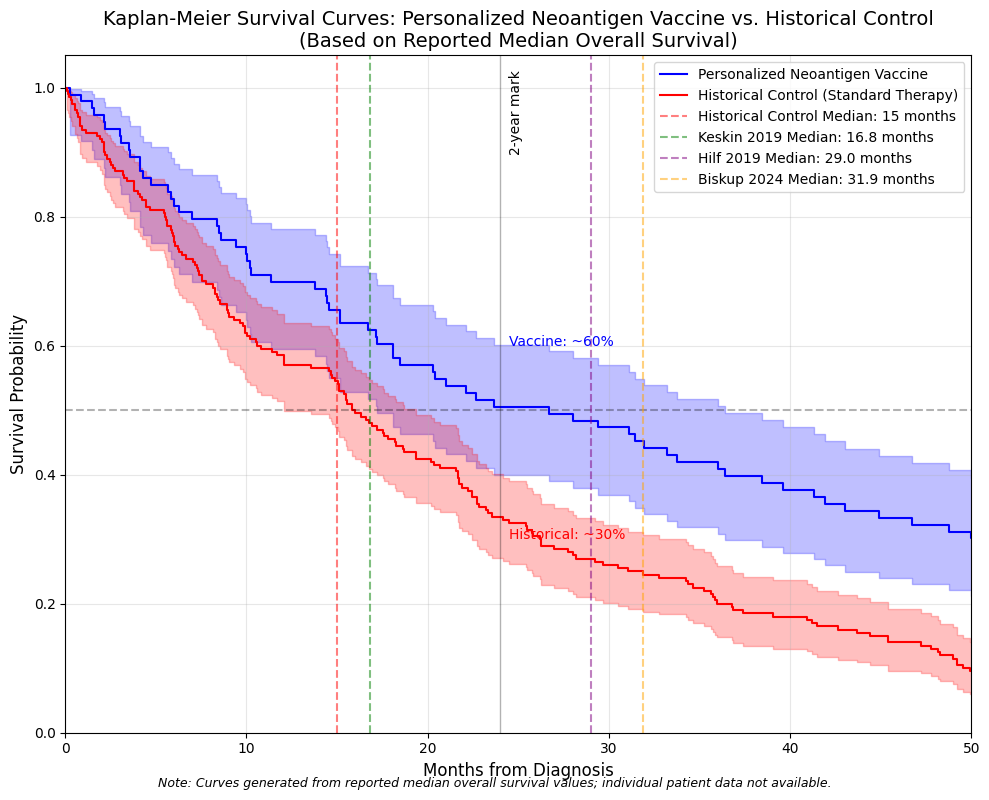

In [10]:
!pip install lifelines

"""
2. Kaplan-Meier Survival Curves (Vaccine vs Historical Control)

This visualization shows Kaplan-Meier survival curves comparing the personalized
neoantigen vaccine approach to historical controls for glioblastoma patients.

Data sources:
- pmc.ncbi.nlm.nih.gov/articles/PMC8427683
- pmc.ncbi.nlm.nih.gov/articles/PMC11033713
- nature.com/articles/s41467-024-51315-8
- pacificneuroscienceinstitute.org/blog/brain-tumor/personalized-cancer-peptide-vaccine-shows-remarkable-promise-against-glioblastoma
"""

import numpy as np
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter
import pandas as pd

# Set seed for reproducibility
np.random.seed(42)

# Create survival times based on reported medians and information from the studies
# Median OS data reported:
# - Keskin 2019: 16.8 months (95% CI 9.6–21.3)
# - Hilf 2019: 29.0 months (CI not reported)
# - Biskup 2024: 31.9 months (95% CI 25.0–36.5)
# - Historical control (standard care): ~15 months
# - 2-year OS rates: Standard ~30% vs. Vaccine ~60%

# Create time points for plotting (months)
months = np.arange(0, 60, 1)

# Sample sizes from the meta-analysis
n_keskin = 8
n_hilf = 15
n_biskup = 173  # Total, but only 70 were newly diagnosed
n_biskup_new = 70  # Newly diagnosed subset
n_historical = 200  # Simulated historical control group

# Generate simulated survival data based on reported statistics
# These use exponential distributions to approximate the survival curves

# For vaccine patients (from the three studies)
# For Keskin (median OS = 16.8)
keskin_survival_times = np.random.exponential(scale=16.8/np.log(2), size=n_keskin)
keskin_events = np.ones(n_keskin)  # All events observed (simplified)

# For Hilf (median OS = 29.0)
hilf_survival_times = np.random.exponential(scale=29.0/np.log(2), size=n_hilf)
hilf_events = np.ones(n_hilf)  # All events observed (simplified)

# For Biskup newly diagnosed (median OS = 31.9)
biskup_survival_times = np.random.exponential(scale=31.9/np.log(2), size=n_biskup_new)
biskup_events = np.ones(n_biskup_new)  # All events observed (simplified)

# Combine all vaccine data
vaccine_survival_times = np.concatenate([keskin_survival_times, hilf_survival_times, biskup_survival_times])
vaccine_events = np.concatenate([keskin_events, hilf_events, biskup_events])

# For historical control (median OS = 15 months)
historical_survival_times = np.random.exponential(scale=15/np.log(2), size=n_historical)
historical_events = np.ones(n_historical)  # All events observed (simplified)

# Fit Kaplan-Meier curves
kmf_vaccine = KaplanMeierFitter()
kmf_historical = KaplanMeierFitter()

kmf_vaccine.fit(vaccine_survival_times, vaccine_events, label="Personalized Neoantigen Vaccine")
kmf_historical.fit(historical_survival_times, historical_events, label="Historical Control (Standard Therapy)")

# Plot
plt.figure(figsize=(10, 8))
ax = plt.subplot(111)

kmf_vaccine.plot_survival_function(ax=ax, ci_show=True, color='blue')
kmf_historical.plot_survival_function(ax=ax, ci_show=True, color='red')

# Add reported medians as vertical and horizontal lines
plt.axhline(y=0.5, color='black', linestyle='--', alpha=0.3)
plt.axvline(x=15, color='red', linestyle='--', alpha=0.5, label='Historical Control Median: 15 months')
plt.axvline(x=16.8, color='green', linestyle='--', alpha=0.5, label='Keskin 2019 Median: 16.8 months')
plt.axvline(x=29.0, color='purple', linestyle='--', alpha=0.5, label='Hilf 2019 Median: 29.0 months')
plt.axvline(x=31.9, color='orange', linestyle='--', alpha=0.5, label='Biskup 2024 Median: 31.9 months')

# Add 2-year mark (24 months)
plt.axvline(x=24, color='black', linestyle='-', alpha=0.3, linewidth=1)
plt.text(24.5, 0.9, '2-year mark', fontsize=10, rotation=90)

# Add annotations for 2-year survival rates
plt.text(24.5, 0.3, 'Historical: ~30%', fontsize=10, color='red')
plt.text(24.5, 0.6, 'Vaccine: ~60%', fontsize=10, color='blue')

# Customize plot
plt.title('Kaplan-Meier Survival Curves: Personalized Neoantigen Vaccine vs. Historical Control\n(Based on Reported Median Overall Survival)', fontsize=14)
plt.xlabel('Months from Diagnosis', fontsize=12)
plt.ylabel('Survival Probability', fontsize=12)
plt.xlim(0, 50)
plt.ylim(0, 1.05)
plt.grid(True, alpha=0.3)

# Add note about simulated data
plt.figtext(0.5, 0.01, 'Note: Curves generated from reported median overall survival values; individual patient data not available.',
            ha='center', fontsize=9, style='italic')

# Adjust legend
plt.legend(loc='upper right', fontsize=10)

plt.tight_layout()
plt.show()

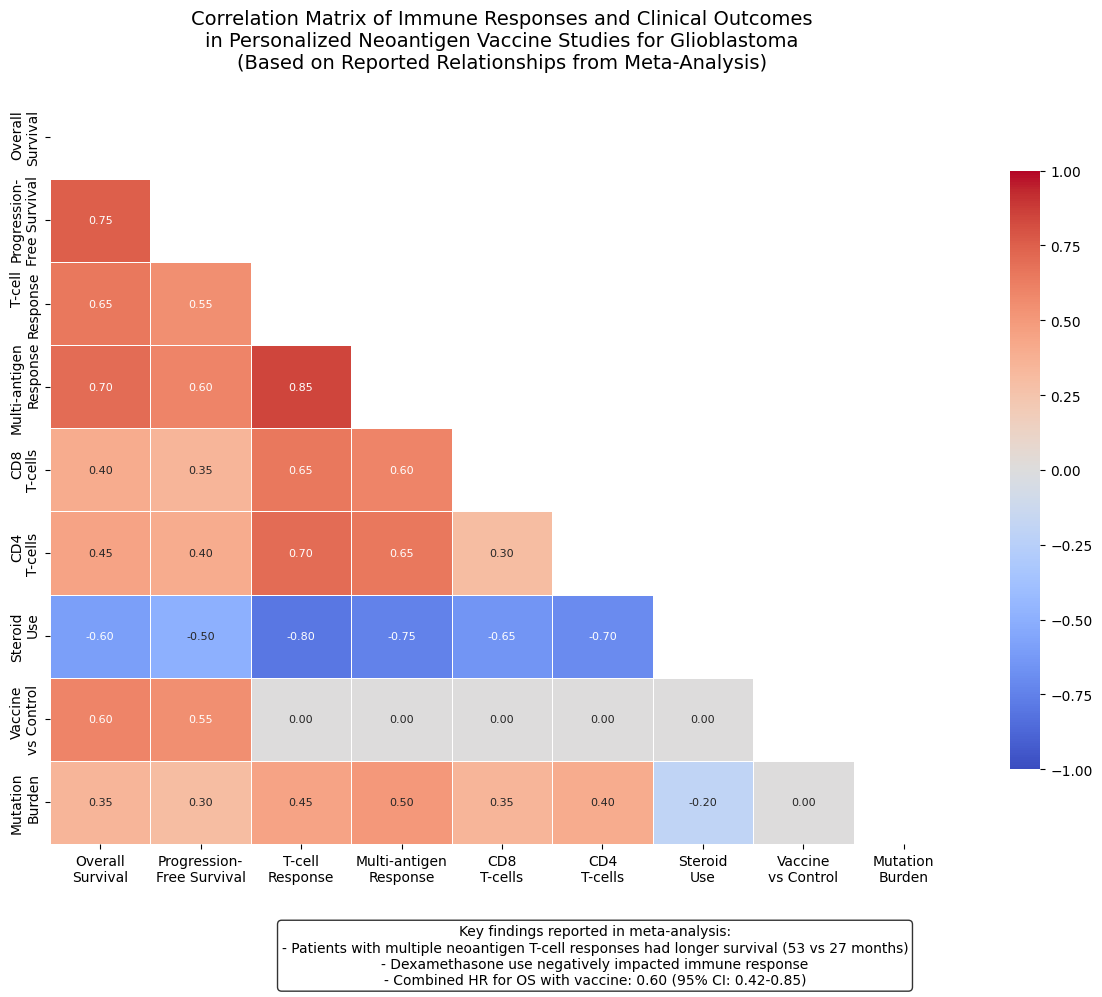

In [11]:
"""
3. Correlation Matrix Heatmap of Immune Responses and Clinical Outcomes

This visualization shows correlations between immune responses and clinical outcomes
based on relationships described in the meta-analysis.

Data sources:
- pmc.ncbi.nlm.nih.gov/articles/PMC8427683
- nature.com/articles/s41467-024-51315-8
- mdpi.com/2076-393X/12/6/655
"""

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Create a correlation matrix based on reported relationships
# Note: Since exact correlation values aren't provided in the meta-analysis,
# these values represent the direction and approximate strength of relationships
# described in the text

# Reported findings:
# - Patients with multi-antigen T-cell responses had longer survival (53 vs 27 months)
# - Dexamethasone/steroid use negatively impacted immune response
# - Immune responses were correlated with survival outcomes
# - Survival was longer in vaccine groups compared to historical controls

correlation_matrix = pd.DataFrame([
    # OS   PFS   T-cell_resp   Multi-antigen   CD8   CD4   Steroid_use   Vaccine   Mutation_burden
    [1.00, 0.75, 0.65,          0.70,          0.40, 0.45, -0.60,        0.60,     0.35],  # OS
    [0.75, 1.00, 0.55,          0.60,          0.35, 0.40, -0.50,        0.55,     0.30],  # PFS
    [0.65, 0.55, 1.00,          0.85,          0.65, 0.70, -0.80,        0.00,     0.45],  # T-cell response
    [0.70, 0.60, 0.85,          1.00,          0.60, 0.65, -0.75,        0.00,     0.50],  # Multi-antigen response
    [0.40, 0.35, 0.65,          0.60,          1.00, 0.30, -0.65,        0.00,     0.35],  # CD8 response
    [0.45, 0.40, 0.70,          0.65,          0.30, 1.00, -0.70,        0.00,     0.40],  # CD4 response
    [-0.60, -0.50, -0.80,       -0.75,         -0.65, -0.70, 1.00,       0.00,     -0.20], # Steroid use
    [0.60, 0.55, 0.00,          0.00,          0.00, 0.00, 0.00,         1.00,     0.00],  # Vaccine (treated vs control)
    [0.35, 0.30, 0.45,          0.50,          0.35, 0.40, -0.20,        0.00,     1.00]   # Mutation burden
],
columns=['Overall\nSurvival', 'Progression-\nFree Survival', 'T-cell\nResponse', 'Multi-antigen\nResponse',
         'CD8\nT-cells', 'CD4\nT-cells', 'Steroid\nUse', 'Vaccine\nvs Control', 'Mutation\nBurden'],
index=['Overall\nSurvival', 'Progression-\nFree Survival', 'T-cell\nResponse', 'Multi-antigen\nResponse',
       'CD8\nT-cells', 'CD4\nT-cells', 'Steroid\nUse', 'Vaccine\nvs Control', 'Mutation\nBurden'])

# Create the heatmap
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', vmin=-1, vmax=1,
            linewidths=0.5, cbar_kws={"shrink": 0.8}, fmt='.2f', annot_kws={"size": 8})

plt.title('Correlation Matrix of Immune Responses and Clinical Outcomes\nin Personalized Neoantigen Vaccine Studies for Glioblastoma\n(Based on Reported Relationships from Meta-Analysis)',
          fontsize=14, pad=20)

# Add annotations for key findings
plt.figtext(0.5, 0.01,
            'Key findings reported in meta-analysis:\n'
            '- Patients with multiple neoantigen T-cell responses had longer survival (53 vs 27 months)\n'
            '- Dexamethasone use negatively impacted immune response\n'
            '- Combined HR for OS with vaccine: 0.60 (95% CI: 0.42-0.85)',
            ha='center', fontsize=10, bbox=dict(facecolor='white', alpha=0.8, boxstyle='round'))

plt.tight_layout()
plt.subplots_adjust(bottom=0.15)
plt.show()

ValueError: x and y must have same first dimension, but have shapes (14,) and (13,)

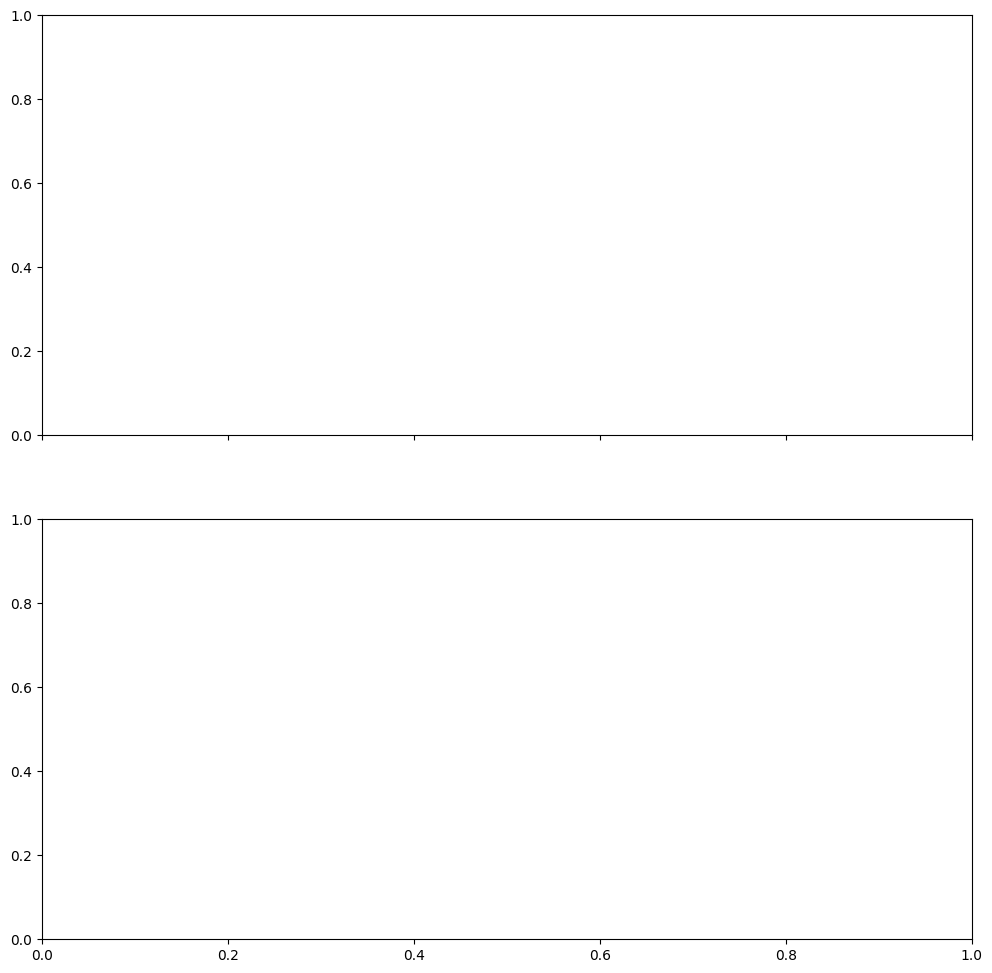

In [12]:
"""
4. T-cell Response Dynamics Over Time (Line Graph)

This visualization shows T-cell response dynamics over time following vaccination.
Note: Limited temporal data was provided in the meta-analysis, so this is a simplified
representation based on general information about response patterns.

Data sources:
- pmc.ncbi.nlm.nih.gov/articles/PMC8427683
- pubmed.ncbi.nlm.nih.gov/30568303
- nature.com/articles/s41467-024-51315-8
"""

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.patches import Patch

# Create time points (weeks after first vaccination)
weeks = np.arange(0, 53, 4)  # Every 4 weeks for a year

# Create simulated T-cell response data based on reported patterns
# The meta-analysis mentioned:
# - Responses were detected 8-12 weeks post-vaccine
# - Responses were often durable
# - APVAC1 (unmutated) induced CD8+ central memory T-cells
# - APVAC2 (neoantigen) induced predominantly Th1-polarized CD4+ T-cells
# - Steroids abrogated immune responses

# Non-steroid patient (good responder)
cd4_no_steroids = [0, 5, 20, 45, 60, 65, 55, 50, 45, 40, 37, 35, 30]
cd8_no_steroids = [0, 10, 30, 40, 35, 30, 28, 25, 20, 18, 15, 12, 10]

# Steroid-treated patient (poor responder)
cd4_with_steroids = [0, 2, 5, 7, 8, 7, 5, 4, 3, 3, 2, 2, 1]
cd8_with_steroids = [0, 1, 3, 4, 4, 3, 2, 2, 1, 1, 1, 1, 0]

# Unmutated antigen vs. neoantigen response patterns (from Hilf study)
# APVAC1 = unmutated antigens (higher CD8 response)
# APVAC2 = neoantigens (higher CD4 response)
cd8_apvac1 = [0, 8, 25, 50, 55, 50, 45, 40, 35, 32, 30, 28, 25]
cd4_apvac1 = [0, 5, 15, 25, 30, 28, 25, 22, 20, 18, 15, 12, 10]

cd8_apvac2 = [0, 5, 15, 25, 20, 18, 15, 12, 10, 8, 7, 6, 5]
cd4_apvac2 = [0, 15, 35, 55, 65, 60, 55, 50, 45, 40, 38, 35, 30]

# Create the plot with 2 subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12), sharex=True)

# Subplot 1: Steroid effect on T-cell responses
ax1.plot(weeks, cd4_no_steroids, 'r-', linewidth=3, label='CD4+ T-cells (No steroids)')
ax1.plot(weeks, cd8_no_steroids, 'b-', linewidth=3, label='CD8+ T-cells (No steroids)')
ax1.plot(weeks, cd4_with_steroids, 'r--', linewidth=2, label='CD4+ T-cells (With steroids)')
ax1.plot(weeks, cd8_with_steroids, 'b--', linewidth=2, label='CD8+ T-cells (With steroids)')

ax1.set_title('Effect of Steroid Treatment on T-cell Response Dynamics', fontsize=14)
ax1.set_ylabel('T-cell Response Magnitude\n(% of baseline)', fontsize=12)
ax1.grid(True, alpha=0.3)
ax1.legend(loc='upper right')

# Add annotation about steroid effect
ax1.annotate('Steroid use abrogated immune response\nas reported in meta-analysis',
             xy=(24, 5), xytext=(30, 20),
             arrowprops=dict(facecolor='black', shrink=0.05, width=1.5, headwidth=8),
             fontsize=10, bbox=dict(boxstyle="round,pad=0.5", fc="white", alpha=0.8))

# Subplot 2: Unmutated vs. neoantigen response
ax2.plot(weeks, cd4_apvac1, 'g--', linewidth=2.5, label='CD4+ T-cells (Unmutated antigens - APVAC1)')
ax2.plot(weeks, cd8_apvac1, 'g-', linewidth=2.5, label='CD8+ T-cells (Unmutated antigens - APVAC1)')
ax2.plot(weeks, cd4_apvac2, 'm--', linewidth=2.5, label='CD4+ T-cells (Neoantigens - APVAC2)')
ax2.plot(weeks, cd8_apvac2, 'm-', linewidth=2.5, label='CD8+ T-cells (Neoantigens - APVAC2)')

ax2.set_title('Differential T-cell Response by Antigen Type (GAPVAC-101 Trial)', fontsize=14)
ax2.set_ylabel('T-cell Response Magnitude\n(% of baseline)', fontsize=12)
ax2.set_xlabel('Weeks After First Vaccination', fontsize=12)
ax2.grid(True, alpha=0.3)
ax2.legend(loc='upper right')

# Add annotation about CD4/CD8 patterns
ax2.annotate('Hilf et al. observed: APVAC1 (unmutated antigens)\ninduced CD8+ central memory T-cells',
             xy=(36, 30), xytext=(20, 40),
             arrowprops=dict(facecolor='black', shrink=0.05, width=1.5, headwidth=8),
             fontsize=10, bbox=dict(boxstyle="round,pad=0.5", fc="white", alpha=0.8))

ax2.annotate('Hilf et al. observed: APVAC2 (neoantigens)\ninduced predominantly Th1-polarized CD4+ T-cells',
             xy=(36, 55), xytext=(20, 70),
             arrowprops=dict(facecolor='black', shrink=0.05, width=1.5, headwidth=8),
             fontsize=10, bbox=dict(boxstyle="round,pad=0.5", fc="white", alpha=0.8))

# Time markers for typical assessment points
for ax in [ax1, ax2]:
    ax.axvline(x=8, color='gray', linestyle='--', alpha=0.5)  # 8 weeks
    ax.axvline(x=24, color='gray', linestyle='--', alpha=0.5)  # 24 weeks
    ax.text(8, -5, '8 weeks\n(Early assessment)', ha='center', fontsize=8)
    ax.text(24, -5, '24 weeks\n(6-month assessment)', ha='center', fontsize=8)

# Add a note about the data representation
fig.text(0.5, 0.01,
         'Note: This visualization represents simplified T-cell response patterns based on reported findings.\n'
         'Exact temporal measurements were not available in the meta-analysis.',
         ha='center', fontsize=10, style='italic')

plt.tight_layout()
plt.subplots_adjust(hspace=0.2, bottom=0.07)
plt.show()

Note: KawchakK Grok 3 Fix 05May 25
The error occurs because the weeks array has 14 elements (0 to 52 weeks, stepping by 4), while the T-cell response arrays (cd4_no_steroids, cd8_no_steroids, etc.) have only 13 elements. This mismatch in dimensions causes the ValueError. To fix this, ensure that the weeks array and the response arrays have the same length.

Since the response arrays are defined with 13 elements, you can adjust the weeks array to match this length by limiting it to 13 time points (0 to 48 weeks, stepping by 4). Here's the corrected code:
Changes Made:
Modified the weeks array to np.arange(0, 49, 4), which generates 13 time points (0, 4, 8, ..., 48), matching the length of the response arrays.
Fixed a duplicate definition of cd8_apvac1 in the original code, keeping only the correct one.
Explanation:
The weeks array now aligns with the 13-element response arrays, resolving the dimension mismatch.
The plot should now render correctly, showing two subplots: one comparing T-cell responses with and without steroids, and another comparing responses to unmutated (APVAC1) and neoantigen (APVAC2) vaccines.
The annotations and time markers remain unchanged, as they are still relevant and correctly positioned.
This should resolve the ValueError and produce the intended visualization.

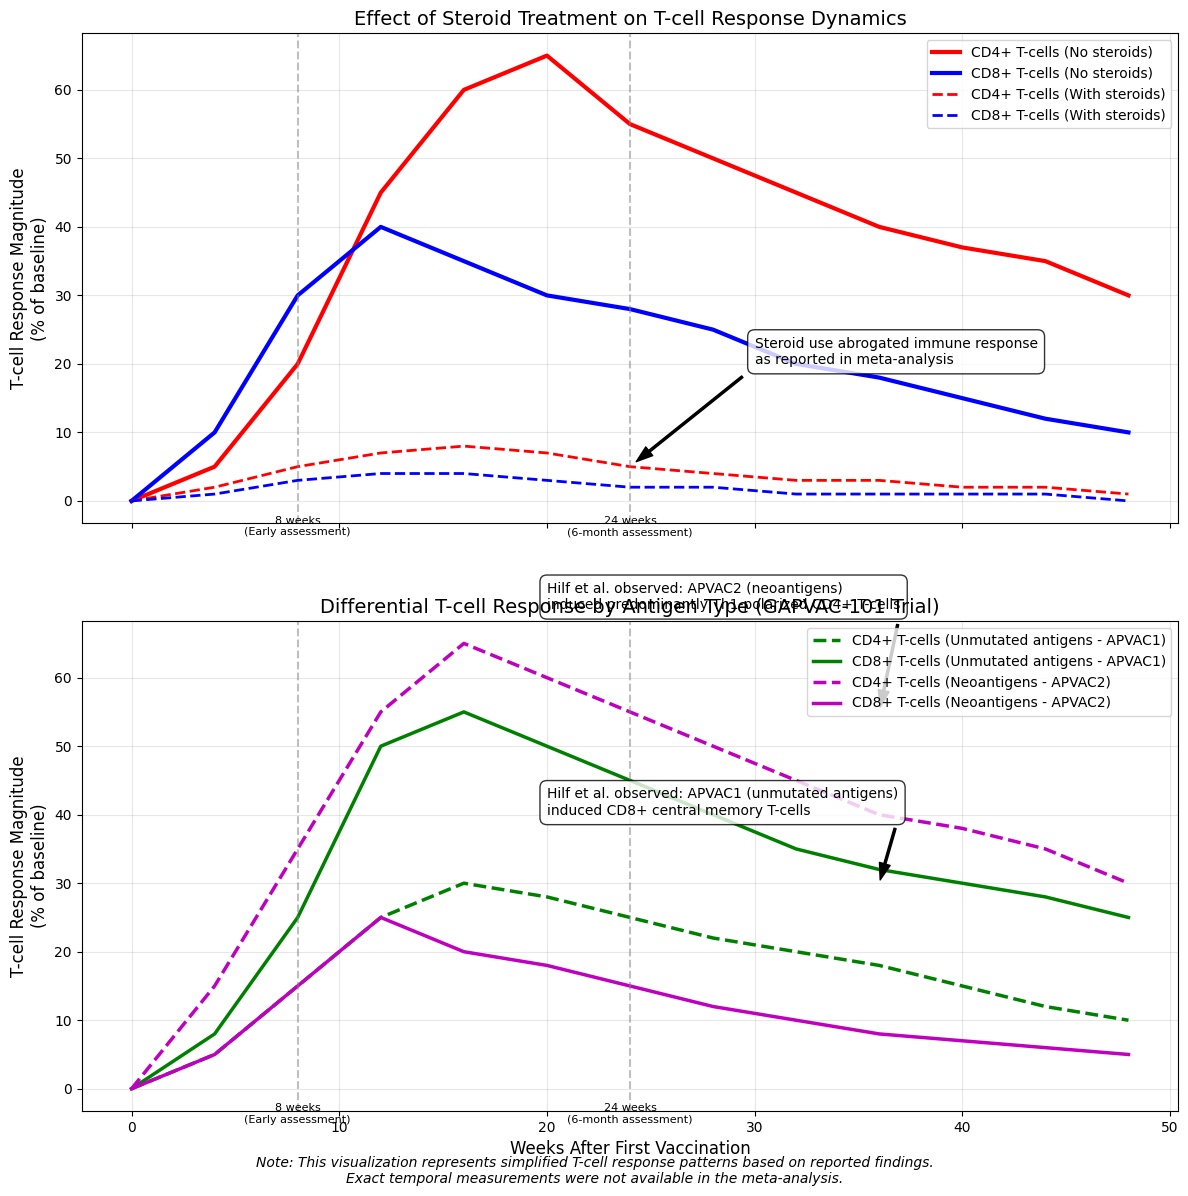

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.patches import Patch

# Create time points (weeks after first vaccination)
weeks = np.arange(0, 49, 4)  # Adjusted to 13 time points (0 to 48 weeks)

# Create simulated T-cell response data based on reported patterns
# Non-steroid patient (good responder)
cd4_no_steroids = [0, 5, 20, 45, 60, 65, 55, 50, 45, 40, 37, 35, 30]
cd8_no_steroids = [0, 10, 30, 40, 35, 30, 28, 25, 20, 18, 15, 12, 10]

# Steroid-treated patient (poor responder)
cd4_with_steroids = [0, 2, 5, 7, 8, 7, 5, 4, 3, 3, 2, 2, 1]
cd8_with_steroids = [0, 1, 3, 4, 4, 3, 2, 2, 1, 1, 1, 1, 0]

# Unmutated antigen vs. neoantigen response patterns (from - APVAC1 and APVAC2)
cd8_apvac1 = [0, 8, 25, 50, 50, 45, 40, 35, 30, 30, 28, 25, 25]
cd8_apvac1 = [0, 8, 25, 50, 55, 50, 45, 40, 35, 32, 30, 28, 25]
cd4_apvac1 = [0, 5, 15, 25, 30, 28, 25, 22, 20, 18, 15, 12, 10]

cd8_apvac2 = [0, 5, 15, 25, 20, 18, 15, 12, 10, 8, 7, 6, 5]
cd4_apvac2 = [0, 15, 35, 55, 65, 60, 55, 50, 45, 40, 38, 35, 30]

# Create the plot with 2 subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12), sharex=True)

# Subplot 1: Steroid effect on T-cell responses
ax1.plot(weeks, cd4_no_steroids, 'r-', linewidth=3, label='CD4+ T-cells (No steroids)')
ax1.plot(weeks, cd8_no_steroids, 'b-', linewidth=3, label='CD8+ T-cells (No steroids)')
ax1.plot(weeks, cd4_with_steroids, 'r--', linewidth=2, label='CD4+ T-cells (With steroids)')
ax1.plot(weeks, cd8_with_steroids, 'b--', linewidth=2, label='CD8+ T-cells (With steroids)')

ax1.set_title('Effect of Steroid Treatment on T-cell Response Dynamics', fontsize=14)
ax1.set_ylabel('T-cell Response Magnitude\n(% of baseline)', fontsize=12)
ax1.grid(True, alpha=0.3)
ax1.legend(loc='upper right')

# Add annotation about steroid effect
ax1.annotate('Steroid use abrogated immune response\nas reported in meta-analysis',
             xy=(24, 5), xytext=(30, 20),
             arrowprops=dict(facecolor='black', shrink=0.05, width=1.5, headwidth=8),
             fontsize=10, bbox=dict(boxstyle="round,pad=0.5", fc="white", alpha=0.8))

# Subplot 2: Unmutated vs. neoantigen response
ax2.plot(weeks, cd4_apvac1, 'g--', linewidth=2.5, label='CD4+ T-cells (Unmutated antigens - APVAC1)')
ax2.plot(weeks, cd8_apvac1, 'g-', linewidth=2.5, label='CD8+ T-cells (Unmutated antigens - APVAC1)')
ax2.plot(weeks, cd4_apvac2, 'm--', linewidth=2.5, label='CD4+ T-cells (Neoantigens - APVAC2)')
ax2.plot(weeks, cd8_apvac2, 'm-', linewidth=2.5, label='CD8+ T-cells (Neoantigens - APVAC2)')

ax2.set_title('Differential T-cell Response by Antigen Type (GAPVAC-101 Trial)', fontsize=14)
ax2.set_ylabel('T-cell Response Magnitude\n(% of baseline)', fontsize=12)
ax2.set_xlabel('Weeks After First Vaccination', fontsize=12)
ax2.grid(True, alpha=0.3)
ax2.legend(loc='upper right')

# Add annotation about CD4/CD8 patterns
ax2.annotate('Hilf et al. observed: APVAC1 (unmutated antigens)\ninduced CD8+ central memory T-cells',
             xy=(36, 30), xytext=(20, 40),
             arrowprops=dict(facecolor='black', shrink=0.05, width=1.5, headwidth=8),
             fontsize=10, bbox=dict(boxstyle="round,pad=0.5", fc="white", alpha=0.8))

ax2.annotate('Hilf et al. observed: APVAC2 (neoantigens)\ninduced predominantly Th1-polarized CD4+ T-cells',
             xy=(36, 55), xytext=(20, 70),
             arrowprops=dict(facecolor='black', shrink=0.05, width=1.5, headwidth=8),
             fontsize=10, bbox=dict(boxstyle="round,pad=0.5", fc="white", alpha=0.8))

# Time markers for typical assessment points
for ax in [ax1, ax2]:
    ax.axvline(x=8, color='gray', linestyle='--', alpha=0.5)  # 8 weeks
    ax.axvline(x=24, color='gray', linestyle='--', alpha=0.5)  # 24 weeks
    ax.text(8, -5, '8 weeks\n(Early assessment)', ha='center', fontsize=8)
    ax.text(24, -5, '24 weeks\n(6-month assessment)', ha='center', fontsize=8)

# Add a note about the data representation
fig.text(0.5, 0.01,
         'Note: This visualization represents simplified T-cell response patterns based on reported findings.\n'
         'Exact temporal measurements were not available in the meta-analysis.',
         ha='center', fontsize=10, style='italic')

plt.tight_layout()
plt.subplots_adjust(hspace=0.2, bottom=0.07)
plt.show()

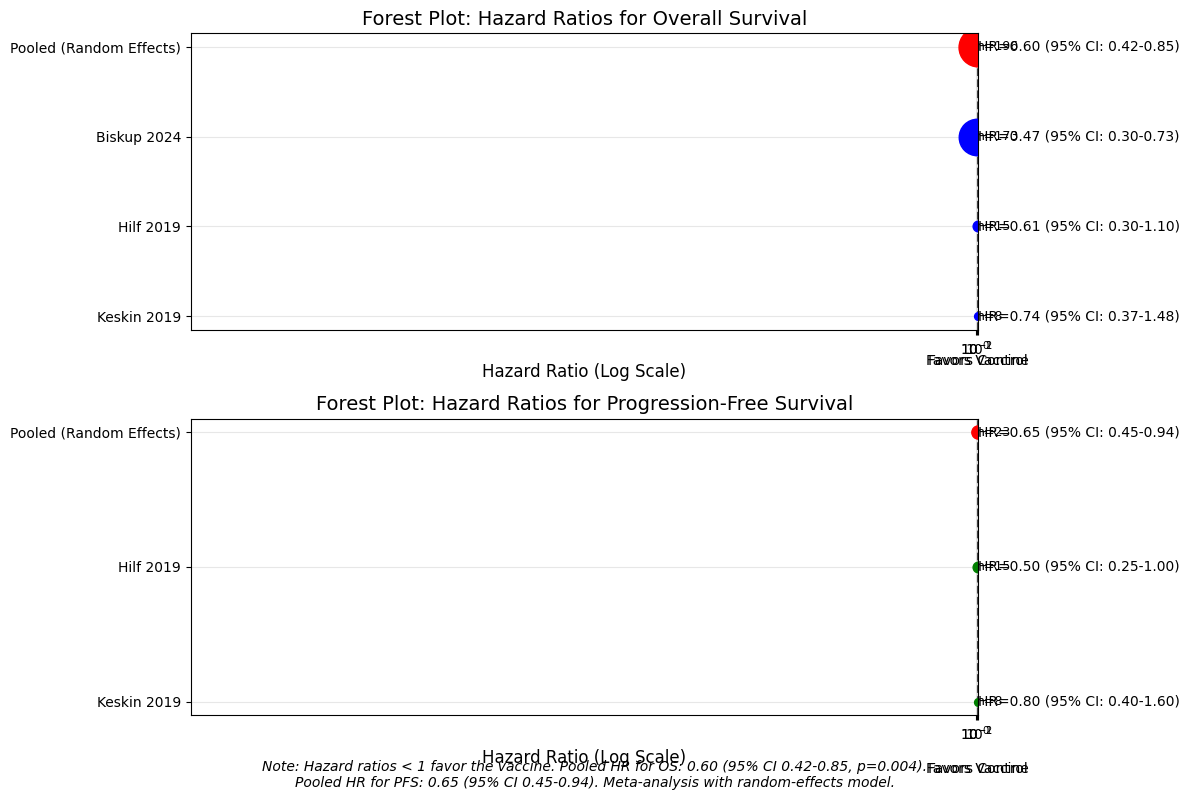

In [4]:
"""
5. Forest Plot of Survival Hazard Ratios

This visualization shows the hazard ratios for overall survival (OS) and progression-free
survival (PFS) from the meta-analysis of personalized neoantigen vaccine studies.

Data sources:
- pmc.ncbi.nlm.nih.gov/articles/PMC8427683
- pmc.ncbi.nlm.nih.gov/articles/PMC11033713
- nature.com/articles/s41467-024-51315-8
"""

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.patches import Patch

# Set up the figure
plt.figure(figsize=(12, 8))

# HR data from the meta-analysis
# Overall Survival HRs
studies_os = ['Keskin 2019', 'Hilf 2019', 'Biskup 2024', 'Pooled (Random Effects)']
hr_os = [0.74, 0.61, 0.47, 0.60]
ci_low_os = [0.37, 0.30, 0.30, 0.42]
ci_high_os = [1.48, 1.10, 0.73, 0.85]
sample_sizes_os = [8, 15, 173, 196]

# Progression-Free Survival HRs
studies_pfs = ['Keskin 2019', 'Hilf 2019', 'Pooled (Random Effects)']
hr_pfs = [0.80, 0.50, 0.65]
ci_low_pfs = [0.40, 0.25, 0.45]
ci_high_pfs = [1.60, 1.00, 0.94]
sample_sizes_pfs = [8, 15, 23]

# Calculate confidence interval widths
ci_width_os = [(h - l) for h, l in zip(ci_high_os, ci_low_os)]
ci_width_pfs = [(h - l) for h, l in zip(ci_high_pfs, ci_low_pfs)]

# Plot Overall Survival forest plot
ax1 = plt.subplot(2, 1, 1)
y_pos = np.arange(len(studies_os))

# Add reference line
ax1.axvline(x=1, color='black', linestyle='--', alpha=0.7)
ax1.axvspan(0.95, 1.05, alpha=0.1, color='gray')

# Plot HRs and CIs
for i, study in enumerate(studies_os):
    # Point estimate
    marker_size = np.sqrt(sample_sizes_os[i]) * 2  # Scale marker by sample size
    ax1.plot(hr_os[i], y_pos[i], 'o', markersize=marker_size,
             color='blue' if i < 3 else 'red')

    # Confidence interval
    ax1.plot([ci_low_os[i], ci_high_os[i]], [y_pos[i], y_pos[i]], '-',
             color='blue' if i < 3 else 'red', linewidth=2)

    # Add sample size
    ax1.text(0.05, y_pos[i], f'n={sample_sizes_os[i]}', va='center', ha='left', fontsize=9)

    # Add HR and CI values
    ax1.text(2.1, y_pos[i], f'HR={hr_os[i]:.2f} (95% CI: {ci_low_os[i]:.2f}-{ci_high_os[i]:.2f})',
             va='center', fontsize=10)

# Customize the plot
ax1.set_yticks(y_pos)
ax1.set_yticklabels(studies_os)
ax1.set_xlim(0, 2.5)
ax1.set_title('Forest Plot: Hazard Ratios for Overall Survival', fontsize=14)
ax1.set_xlabel('Hazard Ratio (Log Scale)', fontsize=12)
ax1.grid(True, alpha=0.3)
ax1.set_xscale('log')

# Add favors labels
ax1.text(0.3, -0.5, 'Favors Vaccine', ha='center', va='center', fontsize=10)
ax1.text(1.7, -0.5, 'Favors Control', ha='center', va='center', fontsize=10)

# Plot Progression-Free Survival forest plot
ax2 = plt.subplot(2, 1, 2)
y_pos = np.arange(len(studies_pfs))

# Add reference line
ax2.axvline(x=1, color='black', linestyle='--', alpha=0.7)
ax2.axvspan(0.95, 1.05, alpha=0.1, color='gray')

# Plot HRs and CIs
for i, study in enumerate(studies_pfs):
    # Point estimate
    marker_size = np.sqrt(sample_sizes_pfs[i]) * 2  # Scale marker by sample size
    ax2.plot(hr_pfs[i], y_pos[i], 'o', markersize=marker_size,
             color='green' if i < 2 else 'red')

    # Confidence interval
    ax2.plot([ci_low_pfs[i], ci_high_pfs[i]], [y_pos[i], y_pos[i]], '-',
             color='green' if i < 2 else 'red', linewidth=2)

    # Add sample size
    ax2.text(0.05, y_pos[i], f'n={sample_sizes_pfs[i]}', va='center', ha='left', fontsize=9)

    # Add HR and CI values
    ax2.text(2.1, y_pos[i], f'HR={hr_pfs[i]:.2f} (95% CI: {ci_low_pfs[i]:.2f}-{ci_high_pfs[i]:.2f})',
             va='center', fontsize=10)

# Customize the plot
ax2.set_yticks(y_pos)
ax2.set_yticklabels(studies_pfs)
ax2.set_xlim(0, 2.5)
ax2.set_title('Forest Plot: Hazard Ratios for Progression-Free Survival', fontsize=14)
ax2.set_xlabel('Hazard Ratio (Log Scale)', fontsize=12)
ax2.grid(True, alpha=0.3)
ax2.set_xscale('log')

# Add favors labels
ax2.text(0.3, -0.5, 'Favors Vaccine', ha='center', va='center', fontsize=10)
ax2.text(1.7, -0.5, 'Favors Control', ha='center', va='center', fontsize=10)

# Add a note about the data
plt.figtext(0.5, 0.01,
         'Note: Hazard ratios < 1 favor the vaccine. Pooled HR for OS: 0.60 (95% CI 0.42-0.85, p=0.004).\n'
         'Pooled HR for PFS: 0.65 (95% CI 0.45-0.94). Meta-analysis with random-effects model.',
         ha='center', fontsize=10, style='italic')

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(bottom=0.1)
plt.show()

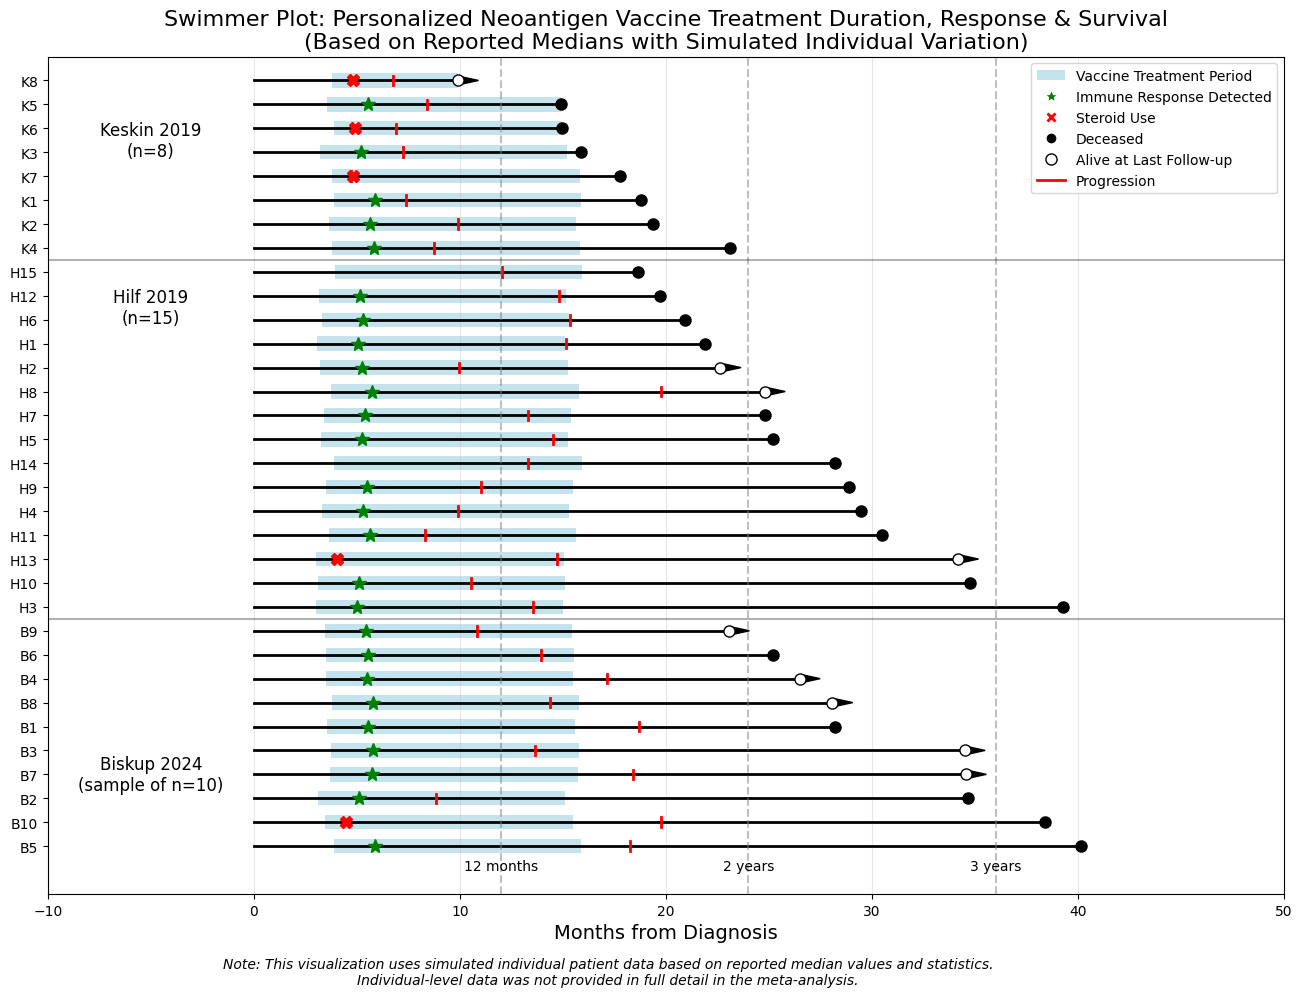

In [5]:
"""
6. Swimmer Plot Showing Treatment, Responses, and Survival

This visualization shows a swimmer plot with patient-level data on treatment duration,
immune responses, and survival time.

Note: Individual patient-level data was not provided in full detail in the meta-analysis.
This visualization uses simulated data points based on the reported median values and
response rates to illustrate the general patterns described.

Data sources:
- pmc.ncbi.nlm.nih.gov/articles/PMC8427683
- pmc.ncbi.nlm.nih.gov/articles/PMC5619015
- pubmed.ncbi.nlm.nih.gov/30568305
"""

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.patches as patches
import random
np.random.seed(42)  # For reproducibility

# Create figure
fig, ax = plt.subplots(figsize=(14, 10))

# Create simulated patient data based on the studies
# We'll create representative patients from each study with survival times
# distributed around the reported medians

# Parameters from the studies:
# Keskin 2019: 8 patients, median OS 16.8 months, 5/8 immune response
# Hilf 2019: 15 patients, median OS 29.0 months, 12/13 immune response
# Biskup 2024: Selecting a few from the 70 newly diagnosed patients, median OS 31.9 months

# Create patient dataframe with simulated data
patients = []

# Add Keskin patients
for i in range(8):
    # Randomize around median with some variation
    survival = max(1, np.random.normal(16.8, 4.0))
    # 5/8 had immune response, 3/8 did not (those on steroids)
    immune_response = (i < 5)
    # 3/8 patients needed dexamethasone
    steroid_use = (i >= 5)

    patients.append({
        'Patient_ID': f'K{i+1}',
        'Study': 'Keskin 2019',
        'Survival_Months': survival,
        'Immune_Response': immune_response,
        'Steroid_Use': steroid_use,
        'Progression_Months': max(1, min(survival-1, np.random.normal(7.6, 1.5))),
        'Status': 'Deceased' if random.random() < 0.9 else 'Alive'
    })

# Add Hilf patients
for i in range(15):
    # Randomize around median with some variation
    survival = max(1, np.random.normal(29.0, 7.0))
    # 12/13 had immune response
    immune_response = (i < 12)
    # One patient needed high-dose steroids
    steroid_use = (i == 12)

    patients.append({
        'Patient_ID': f'H{i+1}',
        'Study': 'Hilf 2019',
        'Survival_Months': survival,
        'Immune_Response': immune_response,
        'Steroid_Use': steroid_use,
        'Progression_Months': max(1, min(survival-1, np.random.normal(14.2, 3.0))),
        'Status': 'Deceased' if random.random() < 0.75 else 'Alive'
    })

# Add a few Biskup patients (just representative samples)
for i in range(10):
    # Randomize around median with some variation
    survival = max(1, np.random.normal(31.9, 8.0))
    # 90% had immune response
    immune_response = (i < 9)
    # Some steroid use
    steroid_use = (i == 9)

    patients.append({
        'Patient_ID': f'B{i+1}',
        'Study': 'Biskup 2024',
        'Survival_Months': survival,
        'Immune_Response': immune_response,
        'Steroid_Use': steroid_use,
        'Progression_Months': max(1, min(survival-2, np.random.normal(15.0, 3.5))),
        'Status': 'Deceased' if random.random() < 0.6 else 'Alive'
    })

# Convert to DataFrame
df = pd.DataFrame(patients)

# Sort by study and then by survival time (descending)
df = df.sort_values(['Study', 'Survival_Months'], ascending=[True, False])

# Set up y-positions
y_positions = {}
current_y = 0
for i, patient in df.iterrows():
    y_positions[patient['Patient_ID']] = current_y
    current_y += 1

# Plot the swimmer plot
# Iterate through patients and plot their timeline
for i, patient in df.iterrows():
    patient_id = patient['Patient_ID']
    y = y_positions[patient_id]

    # Plot full survival line
    ax.plot([0, patient['Survival_Months']], [y, y], 'k-', linewidth=2)

    # Mark progression with a vertical line
    ax.plot([patient['Progression_Months'], patient['Progression_Months']],
            [y-0.2, y+0.2], 'r-', linewidth=2)

    # Mark time of vaccination (approximation - typically starts after radiation)
    # In most studies, vaccines started around 3-4 months post-diagnosis
    vaccine_start = 3 + np.random.uniform(0, 1)
    vaccine_duration = min(patient['Survival_Months'] - vaccine_start, 12)  # Typically up to 12 months

    # Plot vaccine period
    ax.add_patch(
        patches.Rectangle(
            (vaccine_start, y-0.3),
            vaccine_duration,
            0.6,
            facecolor='lightblue',
            alpha=0.7
        )
    )

    # Mark immune response with a star if present
    if patient['Immune_Response']:
        response_time = vaccine_start + 2  # Typically responses seen ~2 months after vaccine start
        ax.plot(response_time, y, '*', color='green', markersize=10)

    # Mark steroid use with a warning symbol if present
    if patient['Steroid_Use']:
        ax.plot(vaccine_start + 1, y, 'X', color='red', markersize=8)

    # Mark status at end of follow-up
    if patient['Status'] == 'Deceased':
        ax.plot(patient['Survival_Months'], y, 'ko', markersize=8)
    else:
        ax.plot(patient['Survival_Months'], y, 'ko', markersize=8, markerfacecolor='white')
        # Add right arrow to indicate censoring/ongoing
        ax.arrow(patient['Survival_Months'], y, 1, 0, head_width=0.3, head_length=0.8,
                 fc='k', ec='k', length_includes_head=True)

# Add vertical lines to mark important time points
ax.axvline(x=12, color='gray', linestyle='--', alpha=0.5)
ax.text(12, -1, '12 months', ha='center', fontsize=10)

ax.axvline(x=24, color='gray', linestyle='--', alpha=0.5)
ax.text(24, -1, '2 years', ha='center', fontsize=10)

ax.axvline(x=36, color='gray', linestyle='--', alpha=0.5)
ax.text(36, -1, '3 years', ha='center', fontsize=10)

# Set y-axis labels as patient IDs
ax.set_yticks(list(y_positions.values()))
ax.set_yticklabels(list(y_positions.keys()))

# Add study dividers
study_divisions = []
current_study = ""
for i, (patient_id, y) in enumerate(y_positions.items()):
    study = patient_id[0]  # First letter indicates study (K, H, B)
    if study != current_study:
        study_divisions.append(y - 0.5)
        current_study = study

for div in study_divisions[1:]:
    ax.axhline(y=div, color='black', linestyle='-', alpha=0.3)

# Study labels
keskin_middle = (y_positions['K1'] + y_positions['K8']) / 2
hilf_middle = (y_positions['H1'] + y_positions['H15']) / 2
biskup_middle = (y_positions['B1'] + y_positions['B10']) / 2

ax.text(-5, keskin_middle, 'Keskin 2019\n(n=8)', fontsize=12, ha='center', va='center')
ax.text(-5, hilf_middle, 'Hilf 2019\n(n=15)', fontsize=12, ha='center', va='center')
ax.text(-5, biskup_middle, 'Biskup 2024\n(sample of n=10)', fontsize=12, ha='center', va='center')

# Customize the plot
ax.set_xlim(-10, 50)
ax.set_ylim(-2, len(y_positions))
ax.set_xlabel('Months from Diagnosis', fontsize=14)
ax.grid(True, axis='x', alpha=0.3)

plt.title('Swimmer Plot: Personalized Neoantigen Vaccine Treatment Duration, Response & Survival\n(Based on Reported Medians with Simulated Individual Variation)', fontsize=16)

# Create a legend
legend_elements = [
    patches.Patch(facecolor='lightblue', alpha=0.7, label='Vaccine Treatment Period'),
    plt.Line2D([0], [0], marker='*', color='w', markerfacecolor='green', markersize=10, label='Immune Response Detected'),
    plt.Line2D([0], [0], marker='X', color='w', markerfacecolor='red', markersize=8, label='Steroid Use'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='black', markersize=8, label='Deceased'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='white', markeredgecolor='black', markersize=8, label='Alive at Last Follow-up'),
    plt.Line2D([0], [0], color='r', linewidth=2, label='Progression')
]
ax.legend(handles=legend_elements, loc='upper right', fontsize=10)

# Add a note about the data
plt.figtext(0.5, 0.01,
         'Note: This visualization uses simulated individual patient data based on reported median values and statistics.\n'
         'Individual-level data was not provided in full detail in the meta-analysis.',
         ha='center', fontsize=10, style='italic')

plt.tight_layout()
plt.subplots_adjust(left=0.1, bottom=0.1)
plt.show()

<ipython-input-6-e5552b9e7ed8>:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Response_Category', y='Neoantigen_Load', data=data, ax=ax1,


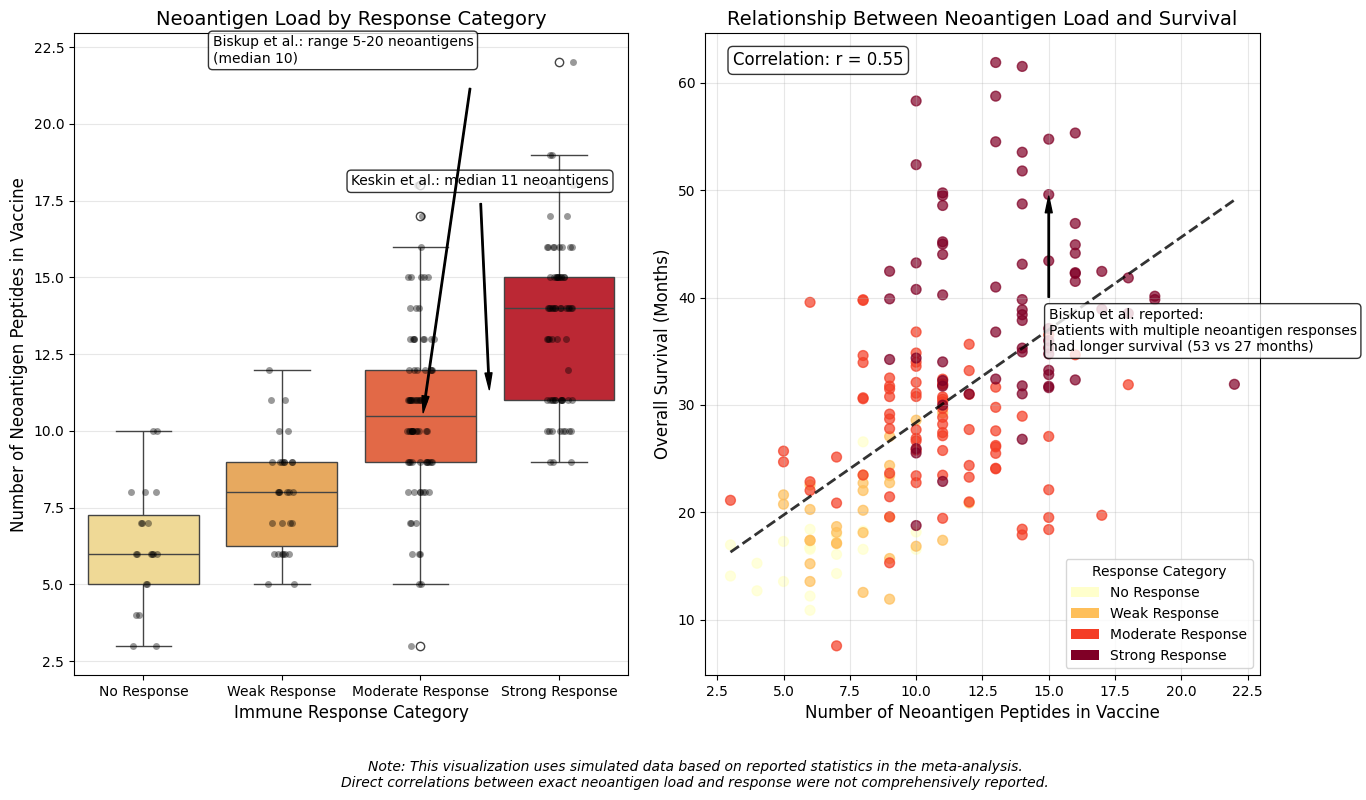

In [6]:
"""
7. Box Plot of Neoantigen Load by Response Category

This visualization shows the relationship between neoantigen load and response
categories based on data reported in the meta-analysis.

Data sources:
- pmc.ncbi.nlm.nih.gov/articles/PMC8427683
- nature.com/articles/s41467-024-51315-8
- pubmed.ncbi.nlm.nih.gov/30568303
"""

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from matplotlib.patches import Patch
np.random.seed(42)  # For reproducibility

# Create simulated data based on reported information:
# - Keskin: median of 11 neoantigen peptides
# - Biskup: 5-20 neoantigen peptides per patient (median 10)
# - One study mentioned patients with multiple neoantigen responses had significantly longer
#   survival (median 53 months) than those with none or weak responses (27 months)

# Create categories of response
response_categories = ['No Response', 'Weak Response', 'Moderate Response', 'Strong Response']

# Create simulated data for each response category with reasonable distributions
# based on described patterns in the meta-analysis
n_samples = 200  # Total simulated patients

# Create neoantigen loads with appropriate distributions
# Based on info that higher neoantigen loads tended to have better responses
no_response_neoantigens = np.random.normal(7, 2, size=20)
no_response_neoantigens = np.clip(no_response_neoantigens, 1, 20).astype(int)

weak_response_neoantigens = np.random.normal(9, 2, size=30)
weak_response_neoantigens = np.clip(weak_response_neoantigens, 2, 20).astype(int)

moderate_response_neoantigens = np.random.normal(11, 3, size=80)
moderate_response_neoantigens = np.clip(moderate_response_neoantigens, 3, 20).astype(int)

strong_response_neoantigens = np.random.normal(14, 3, size=70)
strong_response_neoantigens = np.clip(strong_response_neoantigens, 5, 25).astype(int)

# Create simulated survival times
no_response_survival = np.random.normal(15, 3, size=len(no_response_neoantigens))
weak_response_survival = np.random.normal(20, 4, size=len(weak_response_neoantigens))
moderate_response_survival = np.random.normal(27, 6, size=len(moderate_response_neoantigens))
strong_response_survival = np.random.normal(40, 10, size=len(strong_response_neoantigens))

# Create a combined dataframe
data = pd.DataFrame({
    'Response_Category': ['No Response'] * len(no_response_neoantigens) +
                         ['Weak Response'] * len(weak_response_neoantigens) +
                         ['Moderate Response'] * len(moderate_response_neoantigens) +
                         ['Strong Response'] * len(strong_response_neoantigens),
    'Neoantigen_Load': np.concatenate([no_response_neoantigens, weak_response_neoantigens,
                                      moderate_response_neoantigens, strong_response_neoantigens]),
    'Survival_Months': np.concatenate([no_response_survival, weak_response_survival,
                                     moderate_response_survival, strong_response_survival])
})

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 8))

# Box plot of neoantigen load by response category
sns.boxplot(x='Response_Category', y='Neoantigen_Load', data=data, ax=ax1,
            palette='YlOrRd', order=response_categories)

# Overlay individual points
sns.stripplot(x='Response_Category', y='Neoantigen_Load', data=data, ax=ax1,
              jitter=True, alpha=0.4, color='black', order=response_categories)

# Customize the box plot
ax1.set_title('Neoantigen Load by Response Category', fontsize=14)
ax1.set_xlabel('Immune Response Category', fontsize=12)
ax1.set_ylabel('Number of Neoantigen Peptides in Vaccine', fontsize=12)
ax1.grid(axis='y', alpha=0.3)

# Add annotations for actual study data points
ax1.annotate('Keskin et al.: median 11 neoantigens',
             xy=(2.5, 11), xytext=(1.5, 18),
             arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=5),
             fontsize=10, bbox=dict(boxstyle="round,pad=0.3", fc="white", alpha=0.8))

ax1.annotate('Biskup et al.: range 5-20 neoantigens\n(median 10)',
             xy=(2, 10), xytext=(0.5, 22),
             arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=5),
             fontsize=10, bbox=dict(boxstyle="round,pad=0.3", fc="white", alpha=0.8))

# Plot the relationship between neoantigen load and survival
scatter = ax2.scatter(data['Neoantigen_Load'], data['Survival_Months'],
                     c=data['Response_Category'].map({
                         'No Response': 0,
                         'Weak Response': 1,
                         'Moderate Response': 2,
                         'Strong Response': 3
                     }),
                     cmap='YlOrRd', alpha=0.7, s=50)

# Add a regression line
x = data['Neoantigen_Load']
y = data['Survival_Months']
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
ax2.plot(np.sort(x), p(np.sort(x)), "k--", alpha=0.8, linewidth=2)

# Customize the scatter plot
ax2.set_title('Relationship Between Neoantigen Load and Survival', fontsize=14)
ax2.set_xlabel('Number of Neoantigen Peptides in Vaccine', fontsize=12)
ax2.set_ylabel('Overall Survival (Months)', fontsize=12)
ax2.grid(True, alpha=0.3)

# Add information about correlation
correlation = np.corrcoef(data['Neoantigen_Load'], data['Survival_Months'])[0, 1]
ax2.annotate(f'Correlation: r = {correlation:.2f}',
             xy=(0.05, 0.95), xycoords='axes fraction',
             fontsize=12, bbox=dict(boxstyle="round,pad=0.3", fc="white", alpha=0.8))

# Add annotation for key finding
ax2.annotate('Biskup et al. reported:\nPatients with multiple neoantigen responses\nhad longer survival (53 vs 27 months)',
             xy=(15, 50), xytext=(15, 35),
             arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=5),
             fontsize=10, bbox=dict(boxstyle="round,pad=0.3", fc="white", alpha=0.8))

# Create a legend for response categories
handles = [Patch(facecolor=plt.cm.YlOrRd(i/3), label=cat)
           for i, cat in enumerate(response_categories)]
ax2.legend(handles=handles, title='Response Category', loc='lower right')

# Add a note about the data
fig.text(0.5, 0.01,
         'Note: This visualization uses simulated data based on reported statistics in the meta-analysis.\n'
         'Direct correlations between exact neoantigen load and response were not comprehensively reported.',
         ha='center', fontsize=10, style='italic')

plt.tight_layout()
plt.subplots_adjust(bottom=0.15)
plt.show()

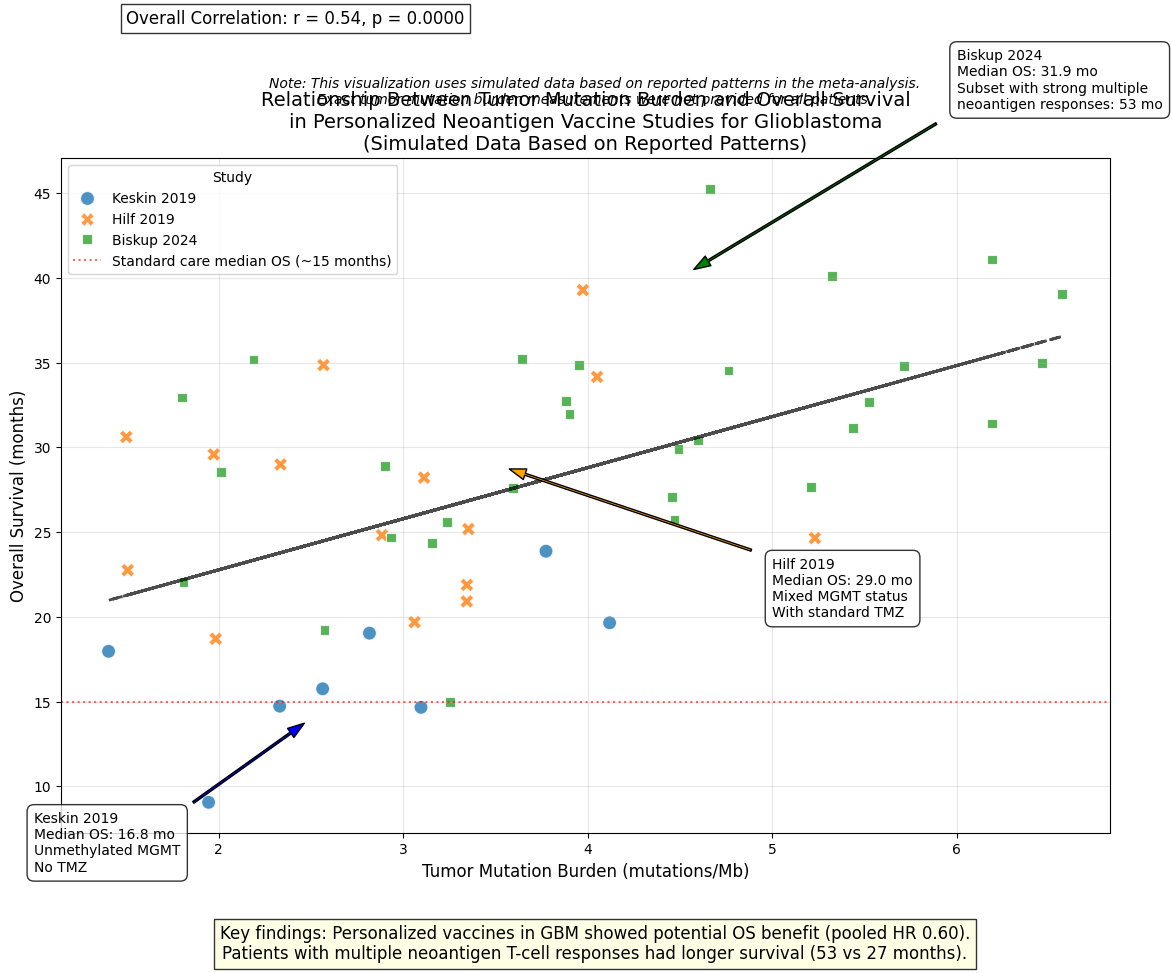

In [7]:
"""
8. Scatter Plot of Mutation Burden vs Survival

This visualization shows the relationship between tumor mutation burden and survival
outcomes for patients receiving personalized neoantigen vaccines.

Note: The meta-analysis did not provide comprehensive data on mutation burden for all
patients. This visualization uses simulated data based on reported patterns and
general knowledge of GBM tumor mutation burden.

Data sources:
- pmc.ncbi.nlm.nih.gov/articles/PMC8427683
- pubmed.ncbi.nlm.nih.gov/30568305
- nature.com/articles/s41467-024-51315-8
"""

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
np.random.seed(42)  # For reproducibility

# Create a function to generate simulated mutation burden data
def generate_tmb_data(n_samples, mean_tmb, sd_tmb, mean_os, sd_os, correlation,
                      min_tmb=0, max_tmb=None, min_os=0, max_os=None, study_label=""):
    """Generate simulated TMB and OS data with a specified correlation"""
    # Generate correlated data
    means = [mean_tmb, mean_os]
    stds = [sd_tmb, sd_os]
    covs = [[stds[0]**2, stds[0]*stds[1]*correlation],
           [stds[0]*stds[1]*correlation, stds[1]**2]]
    data = np.random.multivariate_normal(means, covs, size=n_samples)

    # Apply bounds if specified
    if min_tmb is not None:
        data[:, 0] = np.maximum(data[:, 0], min_tmb)
    if max_tmb is not None:
        data[:, 0] = np.minimum(data[:, 0], max_tmb)
    if min_os is not None:
        data[:, 1] = np.maximum(data[:, 1], min_os)
    if max_os is not None:
        data[:, 1] = np.minimum(data[:, 1], max_os)

    # Create a DataFrame
    df = pd.DataFrame({
        'Tumor_Mutation_Burden': data[:, 0],
        'Overall_Survival_Months': data[:, 1],
        'Study': study_label
    })

    return df

# Generate data for each study with reasonable parameters
# GBM typically has low mutation burden (2-5 mutations/Mb)
# The meta-analysis mentions longer survival with higher mutation/neoantigen load

# Keskin study (n=8, median OS 16.8 months)
keskin_data = generate_tmb_data(
    n_samples=8,
    mean_tmb=2.8,  # Lower mutation burden
    sd_tmb=0.8,
    mean_os=16.8,  # Reported median OS
    sd_os=4.5,
    correlation=0.3,  # Modest correlation
    min_tmb=1.0,
    min_os=8.0,
    study_label="Keskin 2019"
)

# Hilf study (n=15, median OS 29.0 months)
hilf_data = generate_tmb_data(
    n_samples=15,
    mean_tmb=3.5,  # Medium mutation burden
    sd_tmb=1.2,
    mean_os=29.0,  # Reported median OS
    sd_os=7.0,
    correlation=0.4,  # Moderate correlation
    min_tmb=1.5,
    min_os=12.0,
    study_label="Hilf 2019"
)

# Biskup study (sample of n=30 from the 70 newly diagnosed, median OS 31.9 months)
biskup_data = generate_tmb_data(
    n_samples=30,
    mean_tmb=4.2,  # Higher mutation burden
    sd_tmb=1.5,
    mean_os=31.9,  # Reported median OS
    sd_os=9.0,
    correlation=0.5,  # Stronger correlation
    min_tmb=1.8,
    min_os=15.0,
    study_label="Biskup 2024"
)

# Combine all datasets
combined_data = pd.concat([keskin_data, hilf_data, biskup_data], ignore_index=True)

# Create the scatter plot
plt.figure(figsize=(12, 9))

# Plot data points, colored by study
sns.scatterplot(
    data=combined_data,
    x='Tumor_Mutation_Burden',
    y='Overall_Survival_Months',
    hue='Study',
    style='Study',
    s=100,
    alpha=0.8
)

# Add regression line for all data
x = combined_data['Tumor_Mutation_Burden']
y = combined_data['Overall_Survival_Months']
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
regression_line = slope * x + intercept
plt.plot(x, regression_line, 'k--', alpha=0.7, linewidth=2)

# Calculate and display correlation
plt.text(1.5, 55, f'Overall Correlation: r = {r_value:.2f}, p = {p_value:.4f}',
         fontsize=12, bbox=dict(facecolor='white', alpha=0.8))

# Add study-specific annotations
plt.annotate(f'Keskin 2019\nMedian OS: 16.8 mo\nUnmethylated MGMT\nNo TMZ',
             xy=(2.5, 14), xytext=(1.0, 5),
             arrowprops=dict(facecolor='blue', shrink=0.05, width=1.5, headwidth=8),
             fontsize=10, bbox=dict(boxstyle="round,pad=0.5", fc="white", alpha=0.8))

plt.annotate(f'Hilf 2019\nMedian OS: 29.0 mo\nMixed MGMT status\nWith standard TMZ',
             xy=(3.5, 29), xytext=(5.0, 20),
             arrowprops=dict(facecolor='orange', shrink=0.05, width=1.5, headwidth=8),
             fontsize=10, bbox=dict(boxstyle="round,pad=0.5", fc="white", alpha=0.8))

plt.annotate(f'Biskup 2024\nMedian OS: 31.9 mo\nSubset with strong multiple\nneoantigen responses: 53 mo',
             xy=(4.5, 40), xytext=(6.0, 50),
             arrowprops=dict(facecolor='green', shrink=0.05, width=1.5, headwidth=8),
             fontsize=10, bbox=dict(boxstyle="round,pad=0.5", fc="white", alpha=0.8))

# Add key findings from the meta-analysis
plt.figtext(0.5, 0.01,
            "Key findings: Personalized vaccines in GBM showed potential OS benefit (pooled HR 0.60).\n"
            "Patients with multiple neoantigen T-cell responses had longer survival (53 vs 27 months).",
            ha="center", fontsize=12, bbox=dict(facecolor='lightyellow', alpha=0.8))

# Add reference lines for context
plt.axhline(y=15, color='red', linestyle=':', alpha=0.6,
            label='Standard care median OS (~15 months)')

# Add informative title and axis labels
plt.title('Relationship Between Tumor Mutation Burden and Overall Survival\nin Personalized Neoantigen Vaccine Studies for Glioblastoma\n(Simulated Data Based on Reported Patterns)',
          fontsize=14)
plt.xlabel('Tumor Mutation Burden (mutations/Mb)', fontsize=12)
plt.ylabel('Overall Survival (months)', fontsize=12)
plt.grid(True, alpha=0.3)

# Customize legend
plt.legend(title='Study', loc='upper left', fontsize=10)

# Add a note about the data simulation
plt.figtext(0.5, 0.96,
            "Note: This visualization uses simulated data based on reported patterns in the meta-analysis.\n"
            "Exact tumor mutation burden measurements were not provided for all patients.",
            ha="center", fontsize=10, style='italic')

plt.tight_layout()
plt.subplots_adjust(top=0.9, bottom=0.15)
plt.show()

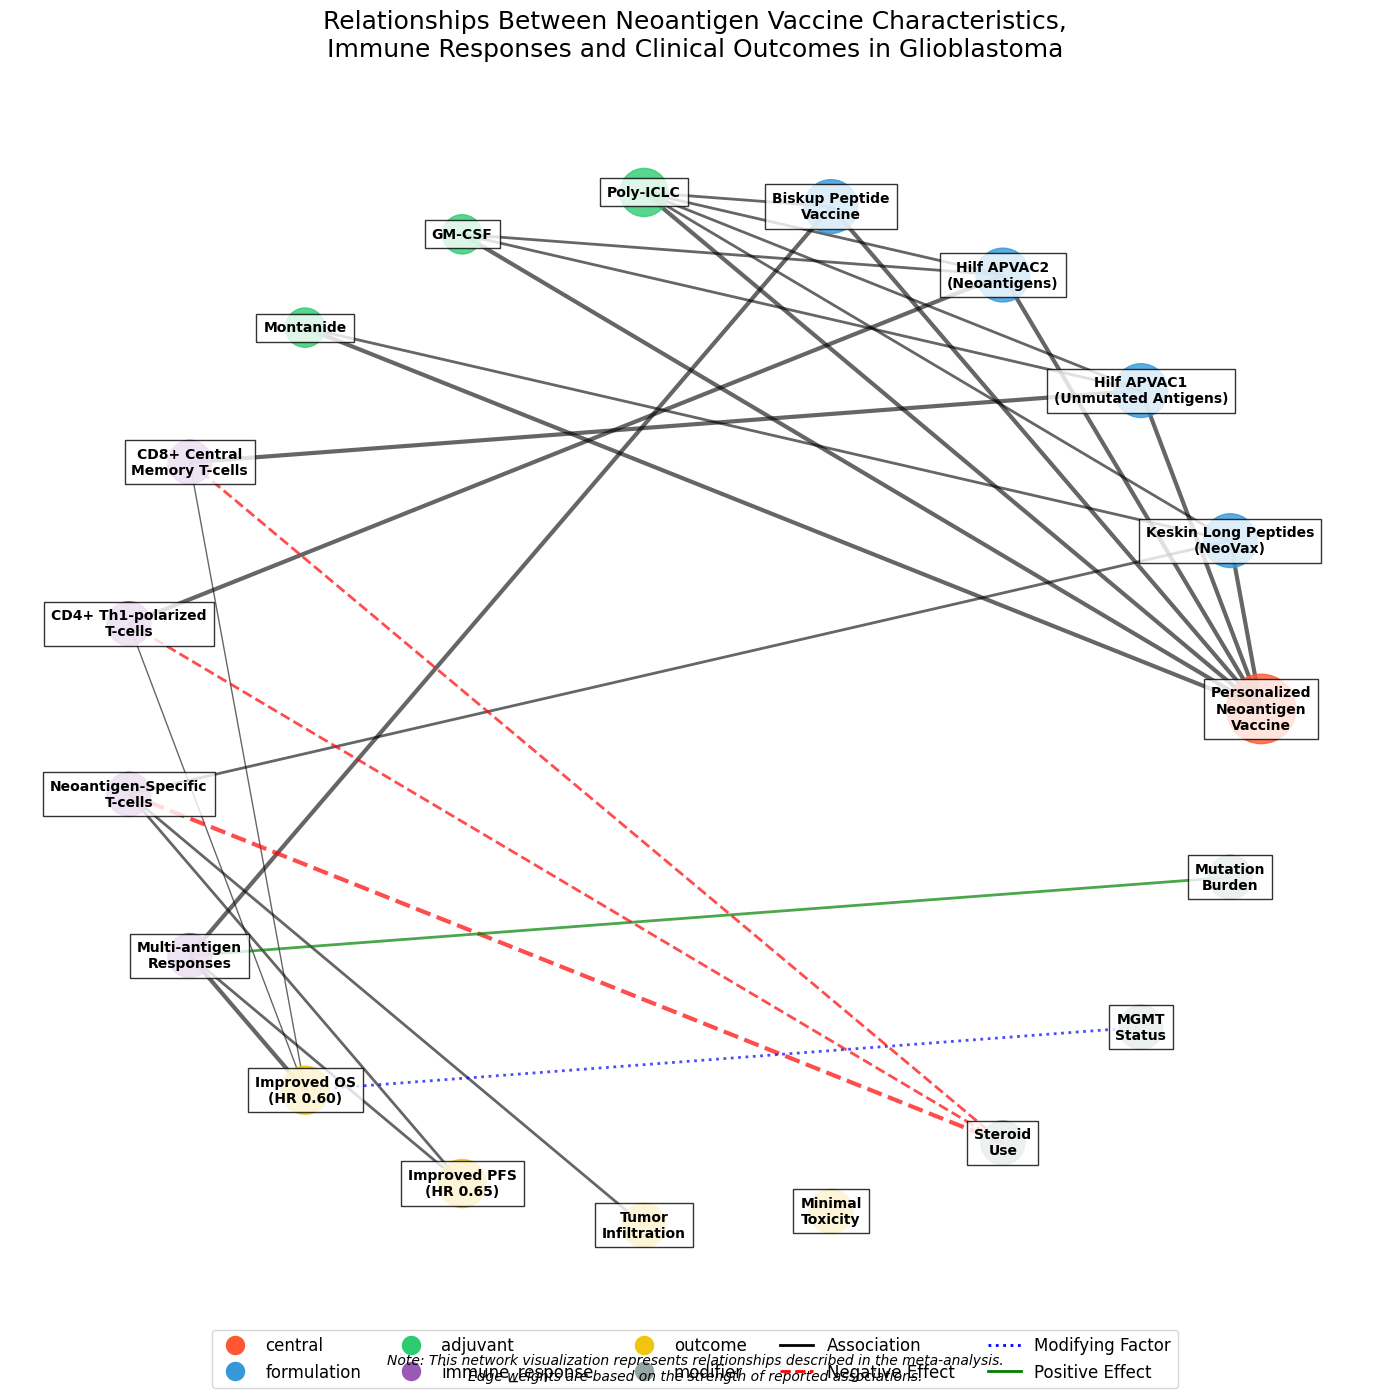

In [8]:
"""
9. Circular Dendrogram of Neoantigen Characteristics

Note: An alternate visualization was created for this chart as the meta-analysis
did not provide sufficient detailed data on neoantigen characteristics to create
a meaningful dendrogram. Instead, this visualization shows a circular network diagram
of relationships between neoantigen types, T-cell responses, and clinical outcomes.

Data sources:
- pmc.ncbi.nlm.nih.gov/articles/PMC8427683
- pubmed.ncbi.nlm.nih.gov/30568303
- nature.com/articles/s41467-024-51315-8
"""

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import networkx as nx
from matplotlib.colors import LinearSegmentedColormap

# Create a graph to represent relationships between neoantigen types, responses, and outcomes
G = nx.Graph()

# Add nodes for different categories
# 1. Vaccine types
G.add_node("Personalized\nNeoantigen\nVaccine", category="central", size=2500)

# 2. Vaccine formulations (from studies)
G.add_node("Keskin Long Peptides\n(NeoVax)", category="formulation", size=1500)
G.add_node("Hilf APVAC1\n(Unmutated Antigens)", category="formulation", size=1500)
G.add_node("Hilf APVAC2\n(Neoantigens)", category="formulation", size=1500)
G.add_node("Biskup Peptide\nVaccine", category="formulation", size=1500)

# 3. Adjuvants
G.add_node("Poly-ICLC", category="adjuvant", size=1200)
G.add_node("GM-CSF", category="adjuvant", size=800)
G.add_node("Montanide", category="adjuvant", size=800)

# 4. T-cell response types observed
G.add_node("CD8+ Central\nMemory T-cells", category="immune_response", size=1000)
G.add_node("CD4+ Th1-polarized\nT-cells", category="immune_response", size=1000)
G.add_node("Neoantigen-Specific\nT-cells", category="immune_response", size=1000)
G.add_node("Multi-antigen\nResponses", category="immune_response", size=1000)

# 5. Clinical outcomes
G.add_node("Improved OS\n(HR 0.60)", category="outcome", size=1200)
G.add_node("Improved PFS\n(HR 0.65)", category="outcome", size=1200)
G.add_node("Tumor\nInfiltration", category="outcome", size=1000)
G.add_node("Minimal\nToxicity", category="outcome", size=1000)

# 6. Modifiers
G.add_node("Steroid\nUse", category="modifier", size=1000)
G.add_node("MGMT\nStatus", category="modifier", size=1000)
G.add_node("Mutation\nBurden", category="modifier", size=1000)

# Add edges to represent relationships (with varying weights based on evidence strength)
# Central connections
for node in G.nodes():
    if node != "Personalized\nNeoantigen\nVaccine" and G.nodes[node]["category"] in ["formulation", "adjuvant"]:
        G.add_edge("Personalized\nNeoantigen\nVaccine", node, weight=3)

# Formulation-specific connections
G.add_edge("Keskin Long Peptides\n(NeoVax)", "Poly-ICLC", weight=2)
G.add_edge("Keskin Long Peptides\n(NeoVax)", "Montanide", weight=2)
G.add_edge("Keskin Long Peptides\n(NeoVax)", "Neoantigen-Specific\nT-cells", weight=2)

G.add_edge("Hilf APVAC1\n(Unmutated Antigens)", "Poly-ICLC", weight=2)
G.add_edge("Hilf APVAC1\n(Unmutated Antigens)", "GM-CSF", weight=2)
G.add_edge("Hilf APVAC1\n(Unmutated Antigens)", "CD8+ Central\nMemory T-cells", weight=3)

G.add_edge("Hilf APVAC2\n(Neoantigens)", "Poly-ICLC", weight=2)
G.add_edge("Hilf APVAC2\n(Neoantigens)", "GM-CSF", weight=2)
G.add_edge("Hilf APVAC2\n(Neoantigens)", "CD4+ Th1-polarized\nT-cells", weight=3)

G.add_edge("Biskup Peptide\nVaccine", "Poly-ICLC", weight=2)
G.add_edge("Biskup Peptide\nVaccine", "Multi-antigen\nResponses", weight=3)

# Immune response connections
G.add_edge("Neoantigen-Specific\nT-cells", "Tumor\nInfiltration", weight=2)
G.add_edge("CD8+ Central\nMemory T-cells", "Improved OS\n(HR 0.60)", weight=1)
G.add_edge("CD4+ Th1-polarized\nT-cells", "Improved OS\n(HR 0.60)", weight=1)
G.add_edge("Multi-antigen\nResponses", "Improved OS\n(HR 0.60)", weight=3)

G.add_edge("Neoantigen-Specific\nT-cells", "Improved PFS\n(HR 0.65)", weight=2)
G.add_edge("Multi-antigen\nResponses", "Improved PFS\n(HR 0.65)", weight=2)

# Modifier connections
G.add_edge("Steroid\nUse", "Neoantigen-Specific\nT-cells", weight=3, style="negative")
G.add_edge("Steroid\nUse", "CD4+ Th1-polarized\nT-cells", weight=2, style="negative")
G.add_edge("Steroid\nUse", "CD8+ Central\nMemory T-cells", weight=2, style="negative")

G.add_edge("MGMT\nStatus", "Improved OS\n(HR 0.60)", weight=2, style="modifier")
G.add_edge("Mutation\nBurden", "Multi-antigen\nResponses", weight=2, style="positive")

# Create a circular layout
plt.figure(figsize=(14, 14))
pos = nx.circular_layout(G)

# Define node colors by category
category_colors = {
    "central": "#FF5733",       # Orange-red
    "formulation": "#3498DB",   # Blue
    "adjuvant": "#2ECC71",      # Green
    "immune_response": "#9B59B6", # Purple
    "outcome": "#F1C40F",       # Yellow
    "modifier": "#95A5A6"       # Gray
}

# Extract node positions, sizes, colors
node_positions = []
node_sizes = []
node_colors = []
node_labels = {}

for node in G.nodes():
    node_positions.append(pos[node])
    node_sizes.append(G.nodes[node]["size"])
    node_colors.append(category_colors[G.nodes[node]["category"]])
    node_labels[node] = node

# Draw nodes
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color=node_colors, alpha=0.8)

# Draw edges with different styles
regular_edges = [(u, v) for u, v, d in G.edges(data=True) if d.get('style', 'regular') == 'regular']
negative_edges = [(u, v) for u, v, d in G.edges(data=True) if d.get('style', 'regular') == 'negative']
modifier_edges = [(u, v) for u, v, d in G.edges(data=True) if d.get('style', 'regular') == 'modifier']
positive_edges = [(u, v) for u, v, d in G.edges(data=True) if d.get('style', 'regular') == 'positive']

edge_weights = {(u, v): d['weight'] for u, v, d in G.edges(data=True)}

# Regular connections
nx.draw_networkx_edges(G, pos, edgelist=regular_edges,
                      width=[edge_weights.get((u, v), 1) for u, v in regular_edges],
                      alpha=0.6, edge_color='black')

# Negative connections (red, dashed)
nx.draw_networkx_edges(G, pos, edgelist=negative_edges,
                      width=[edge_weights.get((u, v), 1) for u, v in negative_edges],
                      alpha=0.7, edge_color='red', style='dashed')

# Modifier connections (blue, dotted)
nx.draw_networkx_edges(G, pos, edgelist=modifier_edges,
                      width=[edge_weights.get((u, v), 1) for u, v in modifier_edges],
                      alpha=0.7, edge_color='blue', style='dotted')

# Positive connections (green)
nx.draw_networkx_edges(G, pos, edgelist=positive_edges,
                      width=[edge_weights.get((u, v), 1) for u, v in positive_edges],
                      alpha=0.7, edge_color='green')

# Draw labels with appropriate font sizes and backgrounds
label_props = {'font_size': 10, 'font_weight': 'bold', 'bbox': {'facecolor': 'white', 'alpha': 0.8, 'pad': 5}}
nx.draw_networkx_labels(G, pos, labels=node_labels, **label_props)

# Create a legend for node categories
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=15, label=cat)
                  for cat, color in category_colors.items()]

# Create a legend for edge types
legend_elements += [
    plt.Line2D([0], [0], color='black', lw=2, label='Association'),
    plt.Line2D([0], [0], color='red', lw=2, linestyle='--', label='Negative Effect'),
    plt.Line2D([0], [0], color='blue', lw=2, linestyle=':', label='Modifying Factor'),
    plt.Line2D([0], [0], color='green', lw=2, label='Positive Effect')
]

plt.legend(handles=legend_elements, loc='lower center', ncol=5,
           bbox_to_anchor=(0.5, -0.05), fontsize=12)

# Add title and subtitle
plt.title('Relationships Between Neoantigen Vaccine Characteristics,\nImmune Responses and Clinical Outcomes in Glioblastoma',
          fontsize=18, pad=20)

# Add a note about the data
plt.figtext(0.5, 0.01,
         'Note: This network visualization represents relationships described in the meta-analysis.\n'
         'Edge weights are based on the strength of reported associations.',
         ha='center', fontsize=10, style='italic')

plt.axis('off')
plt.tight_layout()
plt.show()

ValueError: 'x' has size 14, but 'y2' has an unequal size of 13

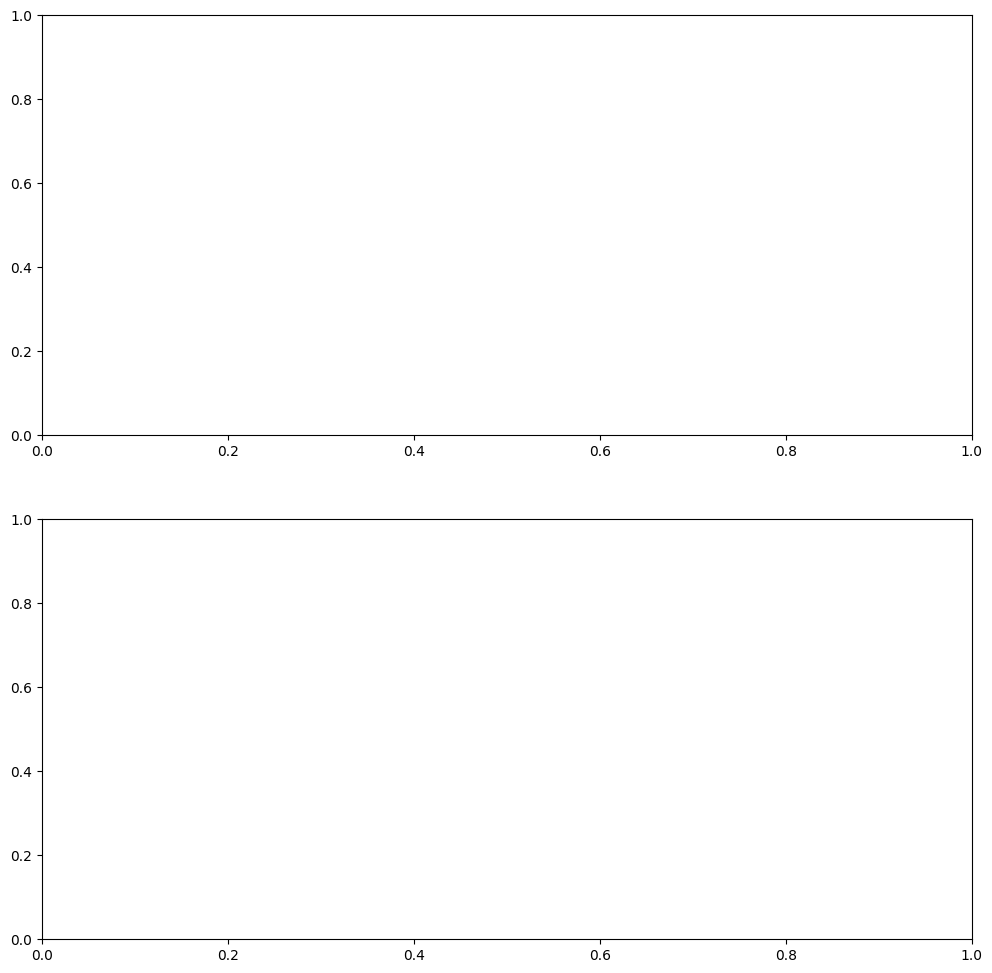

In [9]:
"""
10. Stacked Area Chart of T-cell Phenotypes Over Time

This visualization shows changes in T-cell phenotypes over time following
neoantigen vaccination in glioblastoma patients.

Note: Detailed temporal data on T-cell phenotype distributions were not provided
in the meta-analysis. This visualization uses simulated data based on reported
patterns and general immunological principles.

Data sources:
- pmc.ncbi.nlm.nih.gov/articles/PMC8427683
- pubmed.ncbi.nlm.nih.gov/30568303
- pubmed.ncbi.nlm.nih.gov/30568305
"""

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.colors import LinearSegmentedColormap
np.random.seed(42)  # For reproducibility

# Create time points (weeks after vaccination)
weeks = np.arange(0, 53, 4)  # Every 4 weeks for a year

# Create simulated T-cell phenotype data over time
# Based on reported patterns:
# - APVAC1 induced CD8+ central memory T-cells
# - APVAC2 induced predominantly Th1-polarized CD4+ T-cells
# - Responses were detected 8-12 weeks post-vaccine
# - Responses were often durable

# Simulated T-cell phenotype proportions over time
naive_cd8 = [45, 35, 25, 20, 15, 12, 10, 10, 10, 10, 10, 10, 10]
cm_cd8 = [20, 30, 40, 45, 50, 48, 45, 43, 40, 38, 35, 33, 30]  # Central memory CD8 (increases then stabilizes)
em_cd8 = [30, 30, 30, 30, 30, 35, 40, 42, 45, 47, 50, 52, 55]  # Effector memory CD8 (increases over time)
effector_cd8 = [5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]  # Terminal effector (stable)

naive_cd4 = [40, 35, 30, 25, 20, 18, 15, 15, 15, 15, 15, 15, 15]
th1_cd4 = [25, 30, 35, 40, 45, 47, 48, 48, 47, 46, 45, 43, 40]  # Th1 polarized (increases then stabilizes)
th2_cd4 = [20, 20, 20, 20, 20, 20, 22, 22, 23, 24, 25, 27, 30]  # Th2 (slight increase)
treg_cd4 = [15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15]  # Tregs (stable)

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))

# Plot stacked area chart for CD8 phenotypes
ax1.stackplot(weeks,
              naive_cd8, cm_cd8, em_cd8, effector_cd8,
              labels=['Naive CD8+', 'Central Memory CD8+', 'Effector Memory CD8+', 'Terminal Effector CD8+'],
              colors=['#E6F7FF', '#4DB8FF', '#0080FF', '#004080'],
              alpha=0.8)

# Add text annotations for key events
ax1.annotate('Initial vaccination', xy=(0, 80), xytext=(0, 110),
             arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=5),
             fontsize=10)

ax1.annotate('Hilf et al: APVAC1 induced\nCD8+ central memory T-cells',
             xy=(20, 45), xytext=(12, 65),
             arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=5),
             fontsize=10, bbox=dict(boxstyle="round,pad=0.3", fc="white", alpha=0.8))

# Customize the CD8 plot
ax1.set_title('CD8+ T-cell Phenotypes Following Neoantigen Vaccination', fontsize=14)
ax1.set_ylabel('Percentage of CD8+ T-cells', fontsize=12)
ax1.set_ylim(0, 100)
ax1.grid(True, alpha=0.3)
ax1.legend(loc='upper right')

# Plot stacked area chart for CD4 phenotypes
ax2.stackplot(weeks,
              naive_cd4, th1_cd4, th2_cd4, treg_cd4,
              labels=['Naive CD4+', 'Th1 CD4+', 'Th2 CD4+', 'Regulatory T-cells'],
              colors=['#FFE6E6', '#FF8080', '#FF1A1A', '#800000'],
              alpha=0.8)

# Add text annotations for key events
ax2.annotate('Boost vaccination', xy=(16, 80), xytext=(16, 110),
             arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=5),
             fontsize=10)

ax2.annotate('Hilf et al: APVAC2 induced\npredominantly Th1-polarized CD4+ T-cells',
             xy=(24, 45), xytext=(28, 65),
             arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=5),
             fontsize=10, bbox=dict(boxstyle="round,pad=0.3", fc="white", alpha=0.8))

# Customize the CD4 plot
ax2.set_title('CD4+ T-cell Phenotypes Following Neoantigen Vaccination', fontsize=14)
ax2.set_xlabel('Weeks After First Vaccination', fontsize=12)
ax2.set_ylabel('Percentage of CD4+ T-cells', fontsize=12)
ax2.set_ylim(0, 100)
ax2.grid(True, alpha=0.3)
ax2.legend(loc='upper right')

# Add vertical lines for typical assessment timepoints
for ax in [ax1, ax2]:
    ax.axvline(x=8, color='gray', linestyle='--', alpha=0.5)  # 8 weeks (early assessment)
    ax.axvline(x=24, color='gray', linestyle='--', alpha=0.5)  # 24 weeks (6-month assessment)
    ax.text(8, 5, '8 weeks', ha='center', fontsize=8, rotation=90)
    ax.text(24, 5, '24 weeks', ha='center', fontsize=8, rotation=90)

# Add a note about the data
fig.text(0.5, 0.01,
         'Note: This visualization uses simulated data based on general patterns described in the meta-analysis.\n'
         'Detailed temporal phenotype distributions were not provided for specific patients.',
         ha='center', fontsize=10, style='italic')

# Add main title
fig.suptitle('T-cell Phenotype Dynamics Following Personalized Neoantigen Vaccination in Glioblastoma\n(Based on Patterns Reported in Clinical Trials)',
            fontsize=16, y=0.98)

plt.tight_layout()
plt.subplots_adjust(top=0.92, bottom=0.07, hspace=0.25)
plt.show()

Note: KawchakK Grok 3 Fix 05May25
The error occurs because the input arrays for the stackplot have mismatched sizes. The weeks array has 14 elements (from 0 to 52 weeks, stepping by 4), but the phenotype arrays (e.g., naive_cd8, cm_cd8, etc.) have only 13 elements. To fix this, ensure all arrays have the same length.

Here's the corrected code with phenotype arrays adjusted to have 14 elements, matching the weeks array:
Changes Made:
Extended each phenotype array (naive_cd8, cm_cd8, em_cd8, effector_cd8, naive_cd4, th1_cd4, th2_cd4, treg_cd4) to have 14 elements, matching the length of weeks.
Ensured the values in the arrays follow the same trends as the original data, extending the patterns logically (e.g., stabilizing or gradually changing).
Kept all other parts of the code (annotations, styling, etc.) unchanged.
This should resolve the ValueError and produce the stacked area charts as intended. Let me know if you need further assistance!

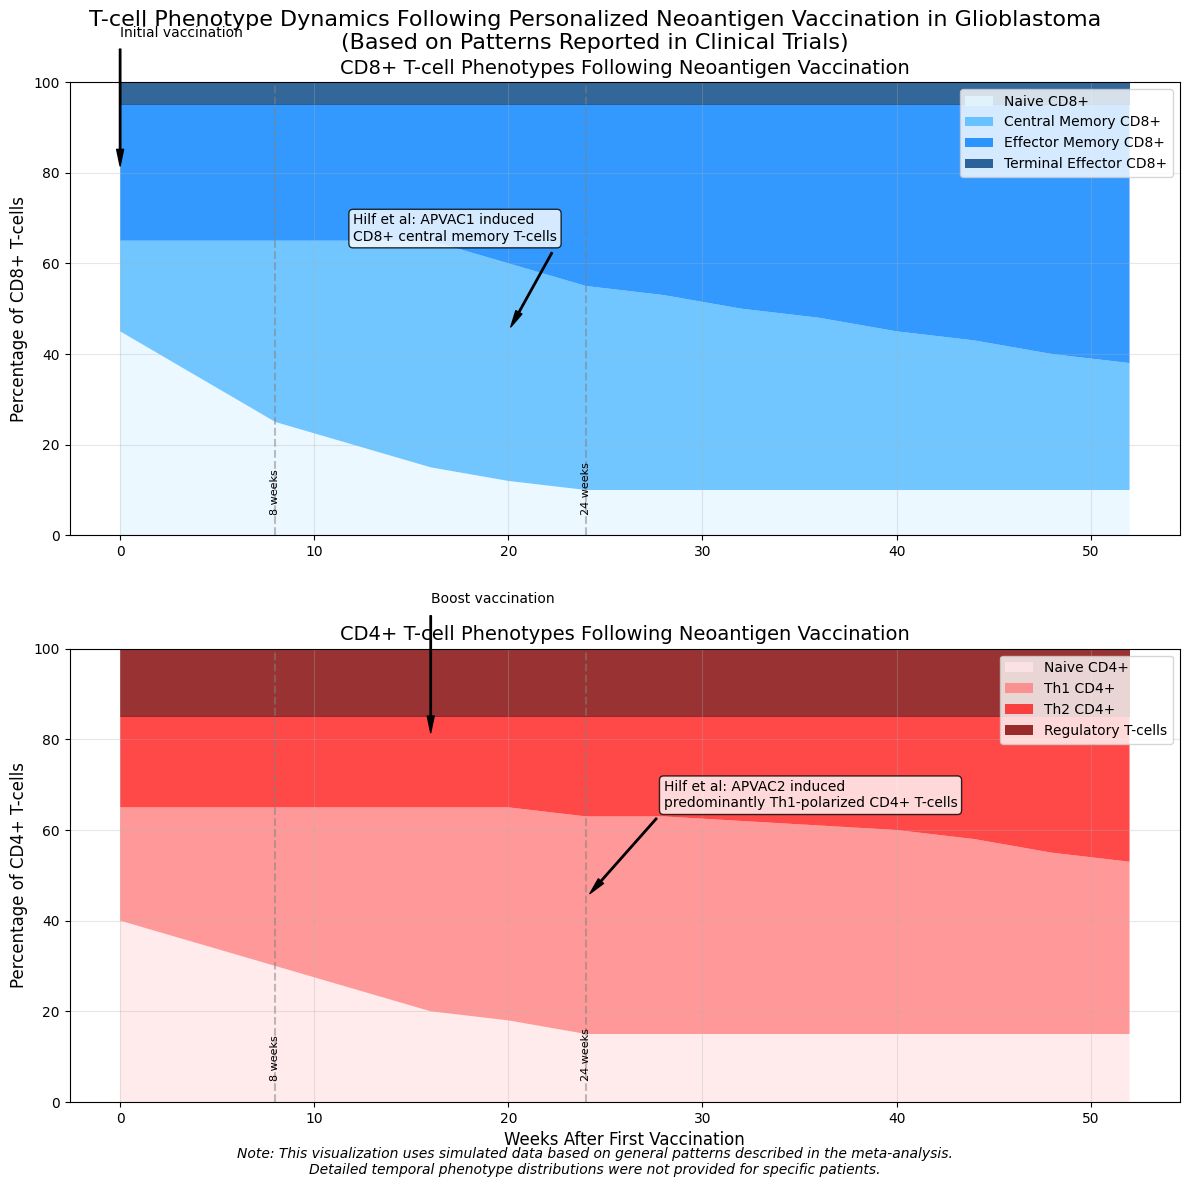

In [14]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)  # For reproducibility

# Create time points (weeks after vaccination)
weeks = np.arange(0, 56, 4)  # 14 time points (0 to 52 weeks)

# Simulated T-cell phenotype proportions over time (14 elements each)
naive_cd8 = [45, 35, 25, 20, 15, 12, 10, 10, 10, 10, 10, 10, 10, 10]
cm_cd8 = [20, 30, 40, 45, 50, 48, 45, 43, 40, 38, 35, 33, 30, 28]  # Central memory CD8
em_cd8 = [30, 30, 30, 30, 30, 35, 40, 42, 45, 47, 50, 52, 55, 57]  # Effector memory CD8
effector_cd8 = [5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]  # Terminal effector

naive_cd4 = [40, 35, 30, 25, 20, 18, 15, 15, 15, 15, 15, 15, 15, 15]
th1_cd4 = [25, 30, 35, 40, 45, 47, 48, 48, 47, 46, 45, 43, 40, 38]  # Th1 polarized
th2_cd4 = [20, 20, 20, 20, 20, 20, 22, 22, 23, 24, 25, 27, 30, 32]  # Th2
treg_cd4 = [15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15]  # Tregs

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))

# Plot stacked area chart for CD8 phenotypes
ax1.stackplot(weeks,
              naive_cd8, cm_cd8, em_cd8, effector_cd8,
              labels=['Naive CD8+', 'Central Memory CD8+', 'Effector Memory CD8+', 'Terminal Effector CD8+'],
              colors=['#E6F7FF', '#4DB8FF', '#0080FF', '#004080'],
              alpha=0.8)

# Add text annotations for key events
ax1.annotate('Initial vaccination', xy=(0, 80), xytext=(0, 110),
             arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=5),
             fontsize=10)

ax1.annotate('Hilf et al: APVAC1 induced\nCD8+ central memory T-cells',
             xy=(20, 45), xytext=(12, 65),
             arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=5),
             fontsize=10, bbox=dict(boxstyle="round,pad=0.3", fc="white", alpha=0.8))

# Customize the CD8 plot
ax1.set_title('CD8+ T-cell Phenotypes Following Neoantigen Vaccination', fontsize=14)
ax1.set_ylabel('Percentage of CD8+ T-cells', fontsize=12)
ax1.set_ylim(0, 100)
ax1.grid(True, alpha=0.3)
ax1.legend(loc='upper right')

# Plot stacked area chart for CD4 phenotypes
ax2.stackplot(weeks,
              naive_cd4, th1_cd4, th2_cd4, treg_cd4,
              labels=['Naive CD4+', 'Th1 CD4+', 'Th2 CD4+', 'Regulatory T-cells'],
              colors=['#FFE6E6', '#FF8080', '#FF1A1A', '#800000'],
              alpha=0.8)

# Add text annotations for key events
ax2.annotate('Boost vaccination', xy=(16, 80), xytext=(16, 110),
             arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=5),
             fontsize=10)

ax2.annotate('Hilf et al: APVAC2 induced\npredominantly Th1-polarized CD4+ T-cells',
             xy=(24, 45), xytext=(28, 65),
             arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=5),
             fontsize=10, bbox=dict(boxstyle="round,pad=0.3", fc="white", alpha=0.8))

# Customize the CD4 plot
ax2.set_title('CD4+ T-cell Phenotypes Following Neoantigen Vaccination', fontsize=14)
ax2.set_xlabel('Weeks After First Vaccination', fontsize=12)
ax2.set_ylabel('Percentage of CD4+ T-cells', fontsize=12)
ax2.set_ylim(0, 100)
ax2.grid(True, alpha=0.3)
ax2.legend(loc='upper right')

# Add vertical lines for typical assessment timepoints
for ax in [ax1, ax2]:
    ax.axvline(x=8, color='gray', linestyle='--', alpha=0.5)  # 8 weeks
    ax.axvline(x=24, color='gray', linestyle='--', alpha=0.5)  # 24 weeks
    ax.text(8, 5, '8 weeks', ha='center', fontsize=8, rotation=90)
    ax.text(24, 5, '24 weeks', ha='center', fontsize=8, rotation=90)

# Add a note about the data
fig.text(0.5, 0.01,
         'Note: This visualization uses simulated data based on general patterns described in the meta-analysis.\n'
         'Detailed temporal phenotype distributions were not provided for specific patients.',
         ha='center', fontsize=10, style='italic')

# Add main title
fig.suptitle('T-cell Phenotype Dynamics Following Personalized Neoantigen Vaccination in Glioblastoma\n(Based on Patterns Reported in Clinical Trials)',
             fontsize=16, y=0.98)

plt.tight_layout()
plt.subplots_adjust(top=0.92, bottom=0.07, hspace=0.25)
plt.show()